In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, KFold, cross_val_score, cross_val_predict


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.svm import SVR
import time

In [4]:
Ames = pd.read_csv('Ames_HousePrice.csv', index_col=0)

Ames_original = Ames.copy()

In [5]:
# Dataset shape
print(Ames.shape)
 
rows, columns = Ames.shape
print(f"The dataset comprises {rows} properties described across {columns} attributes.")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(Ames.head())

(2580, 81)
The dataset comprises 2580 properties described across 81 attributes.
First few rows of the dataset:
         PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
5   Pave   

In [6]:
# Determine the data type for each feature
data_types = Ames.dtypes

# Tally the total by data type
type_counts = data_types.value_counts()

print(type_counts)

object     43
int64      27
float64    11
Name: count, dtype: int64


In [7]:
# Determine the data type for each feature
data_types = Ames.dtypes

# View a few datatypes from the dataset (first and last 5 features)
print(data_types)

PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
MSZoning         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 81, dtype: object


In [6]:
# Check the structure of the dataset
print("\nStructure of the dataset:")
print(Ames.info())


Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   

In [7]:


# Calculating the percentage of missing values for each column
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

# Display columns with missing values
print(missing_info[missing_info['Missing Values'] > 0])

              Missing Values  Percentage
PoolQC                  2571   99.651163
MiscFeature             2483   96.240310
Alley                   2412   93.488372
Fence                   2055   79.651163
MasVnrType              1573   60.968992
FireplaceQu             1241   48.100775
LotFrontage              462   17.906977
GarageQual               129    5.000000
GarageFinish             129    5.000000
GarageYrBlt              129    5.000000
GarageCond               129    5.000000
GarageType               127    4.922481
BsmtExposure              71    2.751938
BsmtFinType2              70    2.713178
BsmtCond                  69    2.674419
BsmtQual                  69    2.674419
BsmtFinType1              69    2.674419
MasVnrArea                14    0.542636
BsmtHalfBath               2    0.077519
BsmtFullBath               2    0.077519
GarageArea                 1    0.038760
GarageCars                 1    0.038760
Electrical                 1    0.038760
BsmtUnfSF       

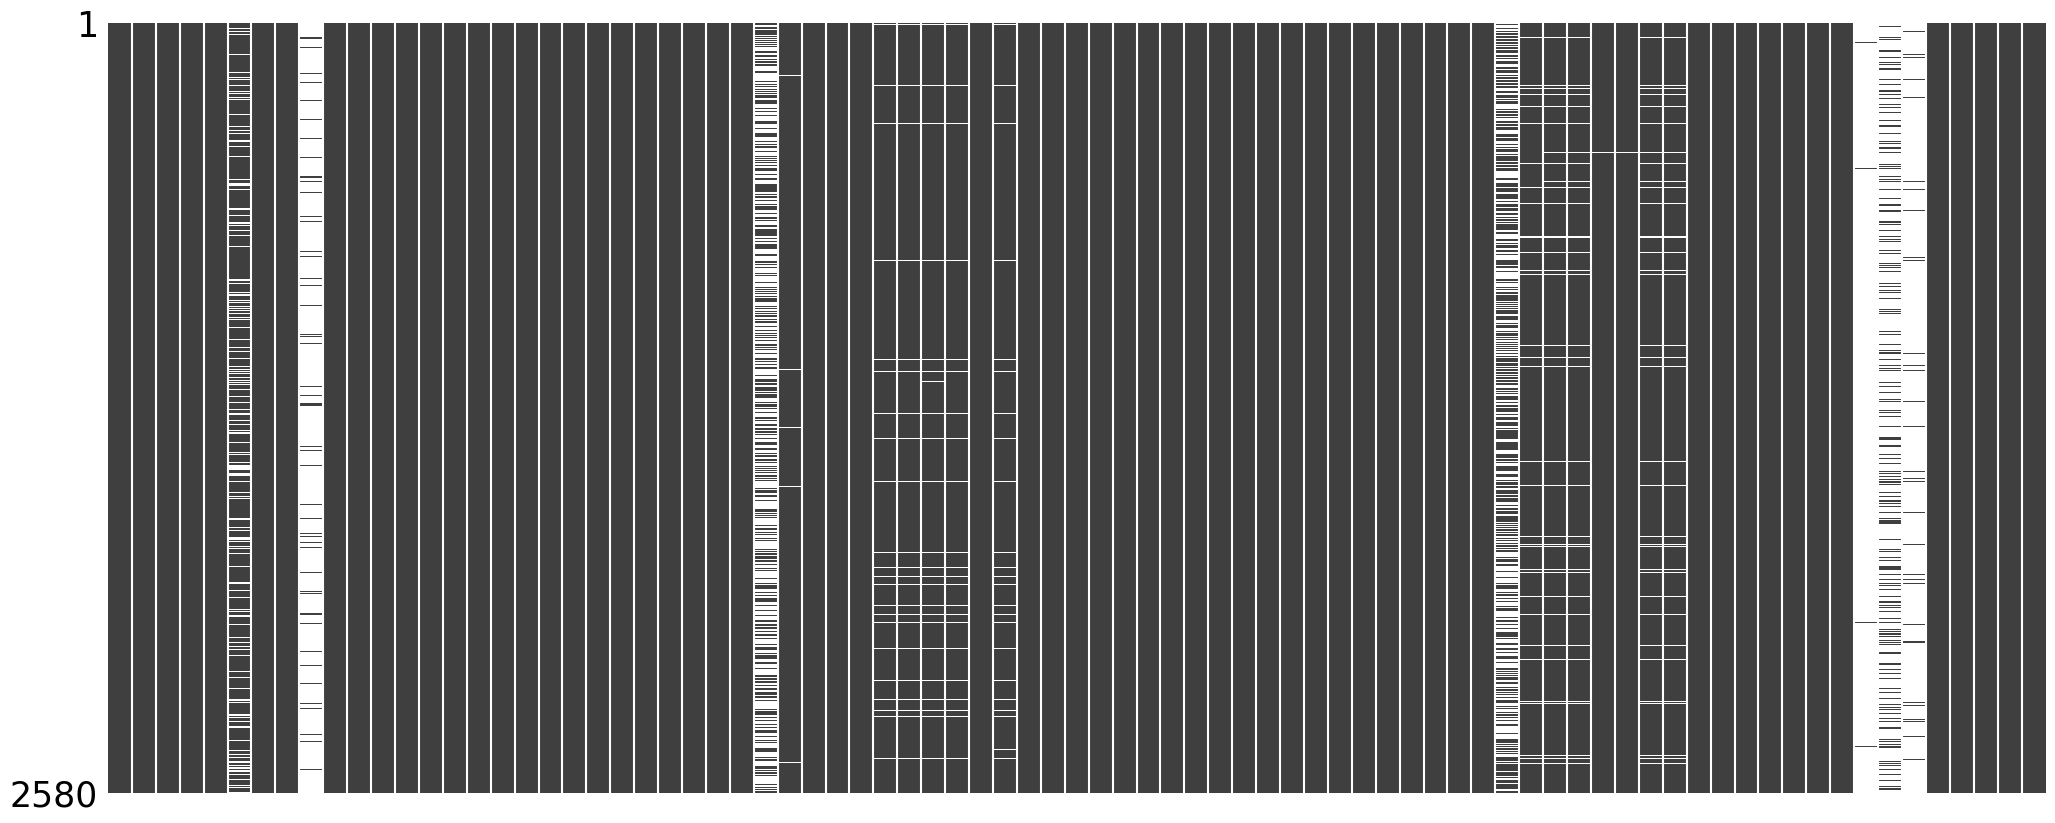

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(Ames, sparkline=False, fontsize=20)
plt.show()

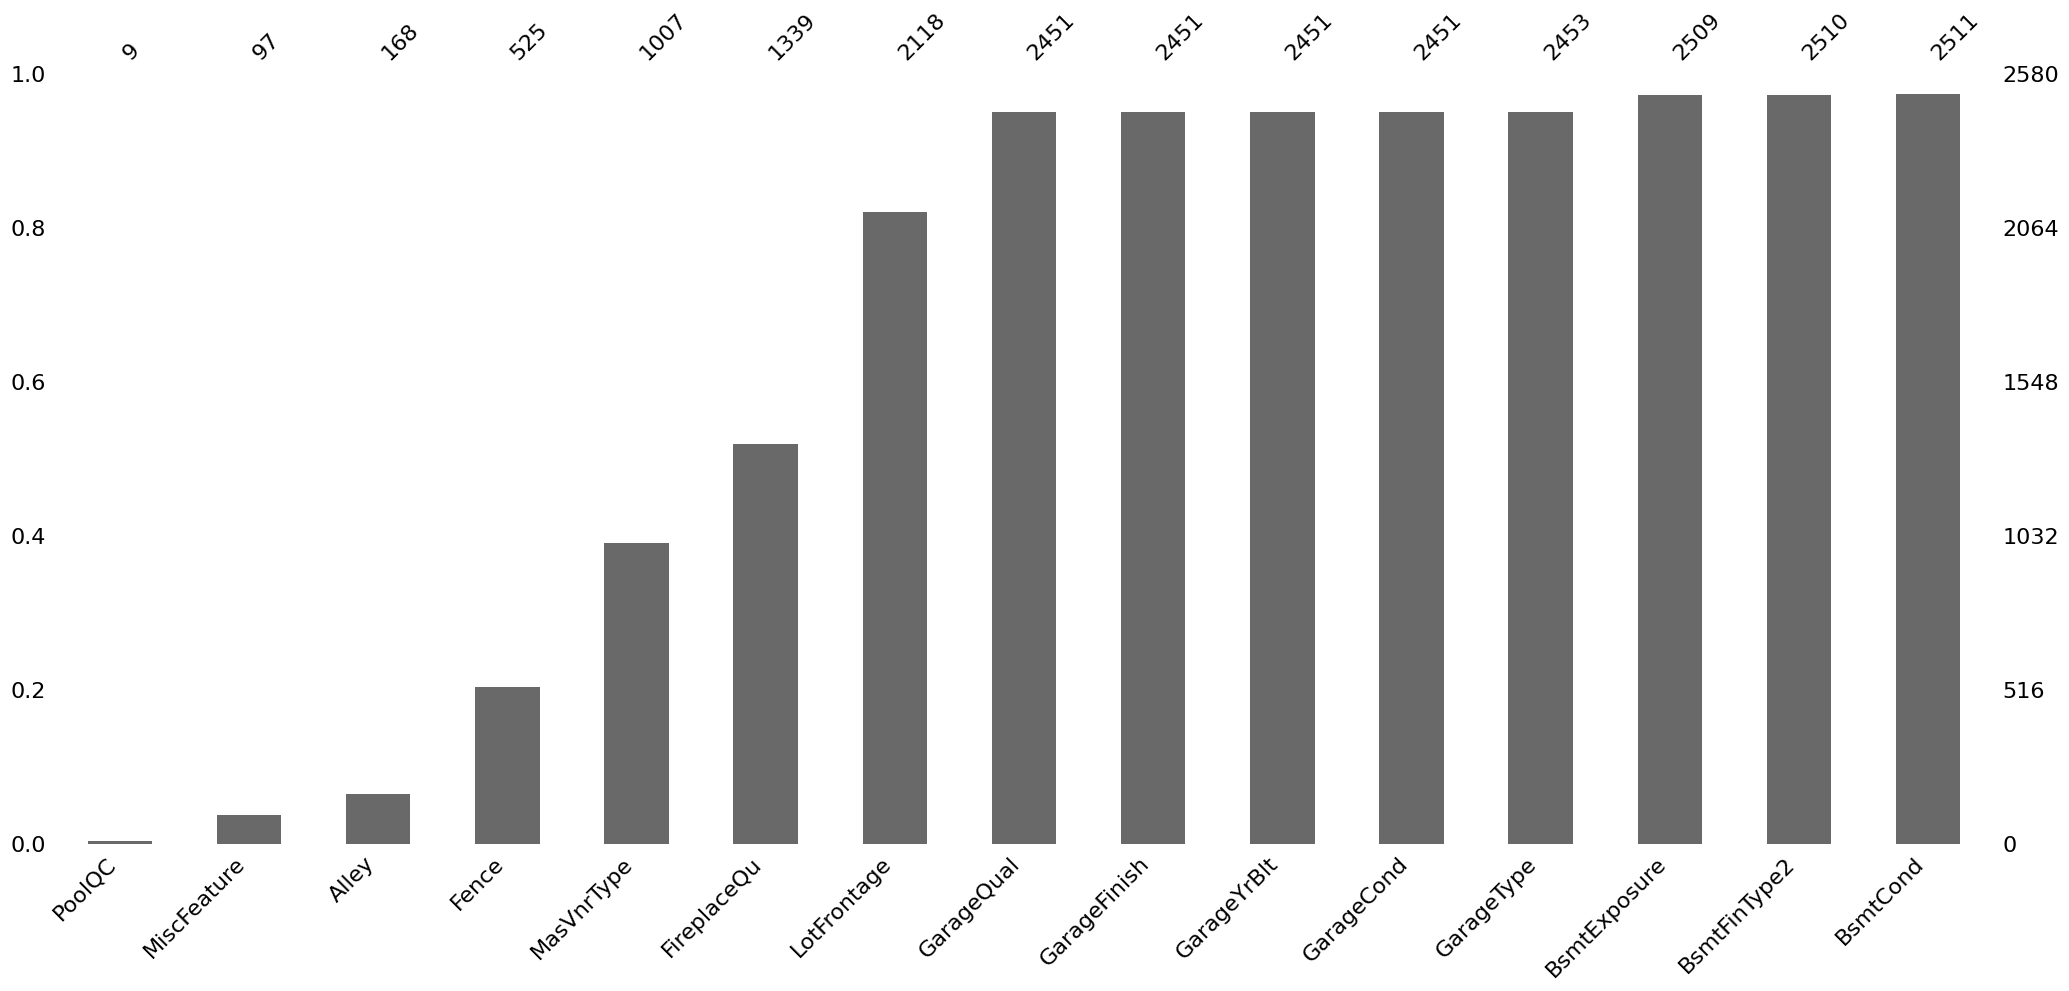

In [9]:
# Calculating the percentage of missing values for each column
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = Ames[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

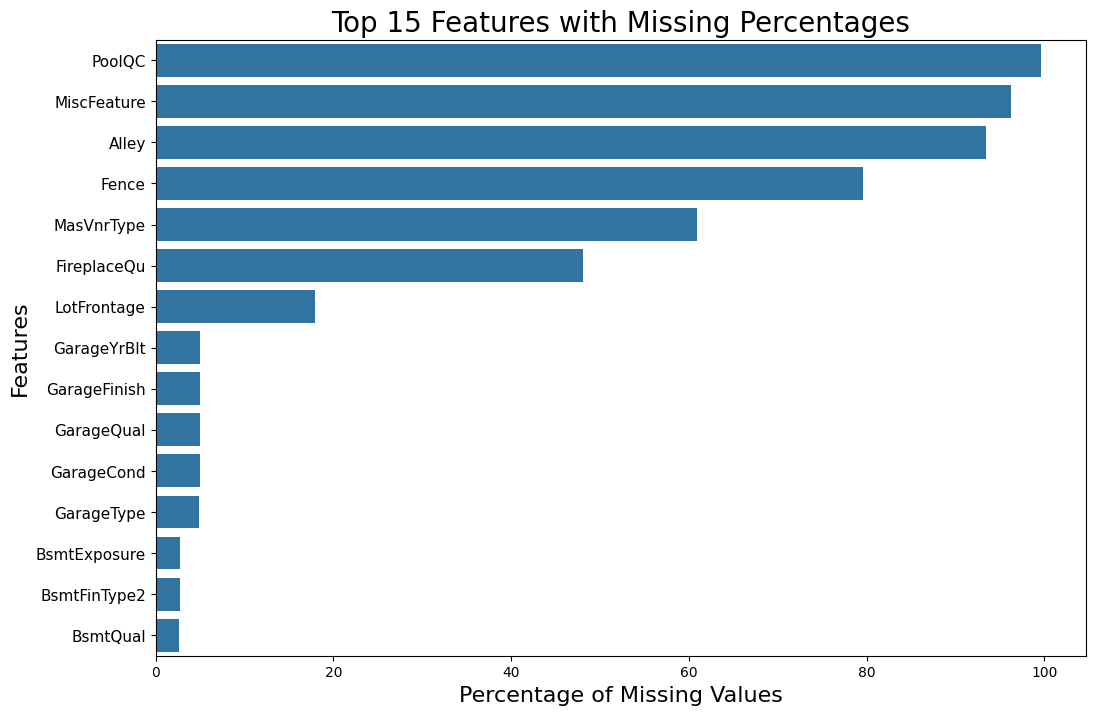

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to show only the top 15 columns with the most missing values
top_15_missing_info = missing_info.nlargest(15, 'Percentage')

# Create the horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y=top_15_missing_info.index, data=top_15_missing_info, orient='h')
plt.title('Top 15 Features with Missing Percentages', fontsize=20)
plt.xlabel('Percentage of Missing Values', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.yticks(fontsize=11)
plt.show()

In [164]:
Ames = Ames_original.copy()

In [11]:
def cap_outliers(df, cols, lower_q=0.01, upper_q=0.99):
    df = df.copy()
    for col in cols:
        lower = df[col].quantile(lower_q)
        upper = df[col].quantile(upper_q)
        df[col] = df[col].clip(lower, upper)
    return df

X = Ames.copy()

X_capped = cap_outliers(
    X,
    cols=["SalePrice", "GrLivArea", "LotArea"],
    lower_q=0.01,  # bottom 1%
    upper_q=0.99   # top 1%
)

print("Before:", Ames.shape, "After:", X_capped.shape)

Before: (2580, 81) After: (2580, 81)


In [27]:
X = X_capped.copy()

# Targeted Feature Engineering
X["GrLivArea_per_LotArea"] = X["GrLivArea"] / (X["LotArea"] + 1)
X["TotalSF"] = X["GrLivArea"] + X["TotalBsmtSF"]
X["HouseAge"] = X["YrSold"].astype(int) - X["YearBuilt"].astype(int)
X["HouseAgeSinceRemod"] = X["YrSold"].astype(int) - X["YearRemodAdd"].astype(int)
X["WasRemodeled"] = X['YearRemodAdd'] > X["YearBuilt"].astype(int)
X["GarageAge"] = X['YrSold'].astype(int) - X['GarageYrBlt']
X["HasPool"] = X["PoolQC"].notna()
X["HasGarage"] = X["GarageType"].notna()
X["TotalPorchSF"] = X["OpenPorchSF"] + X["EnclosedPorch"] + X["3SsnPorch"] + X["ScreenPorch"]
X["QualBin"] = pd.qcut(X["OverallQual"], q=3, labels=["low","med","high"])
X["Neighborhood_QualBin"] = X["Neighborhood"].astype(str) + "_" + X["QualBin"].astype(str)


# initialize only if not already set
try:
    half_weight
except NameError:
    half_weight = 0.5

try:
    b_weight
except NameError:
    b_weight = 1.0

try:
    b_weight_half
except NameError:
    b_weight_half = 0.5


X['TotalBaths'] = X['FullBath'] + half_weight * X['HalfBath'] + b_weight * X['BsmtFullBath'] + b_weight_half * X['BsmtHalfBath']

# mapping dictionary
style_map = {
    "1Story": "Ranch",
    "SFoyer": "Ranch",
    "SLvl": "Ranch",
    "2Story": "Colonial",
    "2.5Fin": "Colonial",
    "2.5Unf": "Colonial",
    "1.5Fin": "Other",
    "1.5Unf": "Other"
}

# apply to dataset
X["RanchColonial"] = X["HouseStyle"].map(style_map)



# Convert the below numeric features to categorical features
X['MSSubClass'] = X['MSSubClass'].astype('object')
X['YrSold'] = X['YrSold'].astype('object')
X['MoSold'] = X['MoSold'].astype('object')
X['WasRemodeled'] = X['WasRemodeled'].astype('object')
X['HasPool'] = X['HasPool'].astype('object')
X['HasGarage'] = X['HasGarage'].astype('object')
X["QualBin"] = X["QualBin"].astype("object")
X["Neighborhood_QualBin"] = X["Neighborhood_QualBin"].astype("object")


# Exclude 'PID' and 'SalePrice' from features and specifically handle the 'Electrical' column
numeric_features = X.select_dtypes(include=['int64', 'float64']).drop(columns=['PID', 'SalePrice']).columns
categorical_features = X.select_dtypes(include=['object']).columns.difference(['Electrical'])
electrical_feature = ['Electrical']

# Manually specify the categories for ordinal encoding according to the data dictionary
ordinal_order = {
    'Electrical': ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],  # Electrical system
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],  # General shape of property
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],  # Type of utilities available
    'LandSlope': ['Sev', 'Mod', 'Gtl'],  # Slope of property
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the quality of the material on the exterior
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the present condition of the material on the exterior
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Height of the basement
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # General condition of the basement
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],  # Walkout or garden level basement walls
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of basement finished area
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of second basement finished area
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Heating quality and condition
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Kitchen quality
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Home functionality
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Fireplace quality
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],  # Interior finish of the garage
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage quality
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage condition
    'PavedDrive': ['N', 'P', 'Y'],  # Paved driveway
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],  # Pool quality
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']  # Fence quality
}

# Extract list of ALL ordinal features from dictionary
ordinal_features = list(ordinal_order.keys())
# List of ordinal features except Electrical
ordinal_except_electrical = [feature for feature in ordinal_features if feature != 'Electrical']

# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.infer_objects(copy=False).fillna("None")


# Pipeline for 'Electrical': Fill missing value with mode then apply ordinal encoding
electrical_transformer = Pipeline(steps=[
    ('impute_electrical', SimpleImputer(strategy='most_frequent')),
    ('ordinal_electrical', OrdinalEncoder(categories=[ordinal_order['Electrical']]))
])
# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean'))
])
# Pipeline for ordinal features: Fill missing values with 'None' then apply ordinal encoding
ordinal_transformer = Pipeline(steps=[
    ('fill_none', FunctionTransformer(fill_none, validate=False)),
    ('ordinal', OrdinalEncoder(categories=[ordinal_order[feature] for feature in ordinal_features if feature in ordinal_except_electrical]))
])
# Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
nominal_features = [feature for feature in categorical_features if feature not in ordinal_features]
# --- make OHE dense and build correct column names ---

# 1) OneHotEncoder: dense output
try:
    categorical_transformer = Pipeline(steps=[
        ('fill_none', FunctionTransformer(fill_none, validate=False)),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # sklearn >= 1.2
    ])
except TypeError:
    categorical_transformer = Pipeline(steps=[
        ('fill_none', FunctionTransformer(fill_none, validate=False)),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))         # fallback for older sklearn
    ])

# 2) Rebuild the ColumnTransformer with the (possibly) new categorical_transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('electrical', electrical_transformer, ['Electrical']),
        ('num',       numeric_transformer,      numeric_features),
        ('ordinal',   ordinal_transformer,      ordinal_except_electrical),
        ('nominal',   categorical_transformer,  nominal_features),
    ]
)

# 3) Fit/transform
transformed_data = preprocessor.fit_transform(X)

# Densify defensively (in case any branch still returns sparse)
if hasattr(transformed_data, "toarray"):
    transformed_data = transformed_data.toarray()

# One-hot feature names (pass the original nominal features)
onehot_step = preprocessor.named_transformers_['nominal'].named_steps['onehot']
onehot_feature_names = onehot_step.get_feature_names_out(nominal_features)

# Assemble names: Electrical (1 col) + numeric + ordinal + one-hot
feature_names = (
    ['Electrical']
    + list(numeric_features)
    + list(ordinal_except_electrical)
    + list(onehot_feature_names)
)

# Build the DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=feature_names, index=X.index)

In [169]:
# # Targeted Feature Engineering
# Ames["GrLivArea_per_LotArea"] = Ames["GrLivArea"] / (Ames["LotArea"] + 1)
# Ames["TotalSF"] = Ames["TotalBsmtSF"] + Ames["1stFlrSF"] + Ames["2ndFlrSF"]
# Ames['TotalBaths'] = Ames['FullBath'] + 0.5 * Ames['HalfBath'] + Ames['BsmtFullBath'] + 0.5*Ames['BsmtHalfBath']
# Ames["HouseAge"] = Ames["YrSold"].astype(int) - Ames["YearBuilt"].astype(int)
# Ames["HouseAgeSinceRemod"] = Ames["YrSold"].astype(int) - Ames["YearRemodAdd"].astype(int)
# Ames["WasRemodeled"] = Ames['YearRemodAdd'] > Ames["YearBuilt"].astype(int)
# Ames["GarageAge"] = Ames['YrSold'].astype(int) - Ames['GarageYrBlt']



# # Convert the below numeric features to categorical features
# Ames['MSSubClass'] = Ames['MSSubClass'].astype('object')
# Ames['YrSold'] = Ames['YrSold'].astype('object')
# Ames['MoSold'] = Ames['MoSold'].astype('object')
# Ames['WasRemodeled'] = Ames['WasRemodeled'].astype('object')



# # Exclude 'PID' and 'SalePrice' from features and specifically handle the 'Electrical' column
# numeric_features = Ames.select_dtypes(include=['int64', 'float64']).drop(columns=['PID', 'SalePrice']).columns
# categorical_features = Ames.select_dtypes(include=['object']).columns.difference(['Electrical'])
# electrical_feature = ['Electrical']

# # Manually specify the categories for ordinal encoding according to the data dictionary
# ordinal_order = {
#     'Electrical': ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],  # Electrical system
#     'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],  # General shape of property
#     'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],  # Type of utilities available
#     'LandSlope': ['Sev', 'Mod', 'Gtl'],  # Slope of property
#     'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the quality of the material on the exterior
#     'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the present condition of the material on the exterior
#     'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Height of the basement
#     'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # General condition of the basement
#     'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],  # Walkout or garden level basement walls
#     'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of basement finished area
#     'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of second basement finished area
#     'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Heating quality and condition
#     'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Kitchen quality
#     'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Home functionality
#     'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Fireplace quality
#     'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],  # Interior finish of the garage
#     'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage quality
#     'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage condition
#     'PavedDrive': ['N', 'P', 'Y'],  # Paved driveway
#     'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],  # Pool quality
#     'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']  # Fence quality
# }

# # Extract list of ALL ordinal features from dictionary
# ordinal_features = list(ordinal_order.keys())
# # List of ordinal features except Electrical
# ordinal_except_electrical = [feature for feature in ordinal_features if feature != 'Electrical']

# # Helper function to fill 'None' for missing categorical data
# def fill_none(X):
#     return X.infer_objects(copy=False).fillna("None")


# # Pipeline for 'Electrical': Fill missing value with mode then apply ordinal encoding
# electrical_transformer = Pipeline(steps=[
#     ('impute_electrical', SimpleImputer(strategy='most_frequent')),
#     ('ordinal_electrical', OrdinalEncoder(categories=[ordinal_order['Electrical']]))
# ])
# # Pipeline for numeric features: Impute missing values using mean
# numeric_transformer = Pipeline(steps=[
#     ('impute_mean', SimpleImputer(strategy='mean'))
# ])
# # Pipeline for ordinal features: Fill missing values with 'None' then apply ordinal encoding
# ordinal_transformer = Pipeline(steps=[
#     ('fill_none', FunctionTransformer(fill_none, validate=False)),
#     ('ordinal', OrdinalEncoder(categories=[ordinal_order[feature] for feature in ordinal_features if feature in ordinal_except_electrical]))
# ])
# # Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
# nominal_features = [feature for feature in categorical_features if feature not in ordinal_features]
# categorical_transformer = Pipeline(steps=[
#     ('fill_none', FunctionTransformer(fill_none, validate=False)),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])
# # Combined preprocessor for numeric, ordinal, nominal, and specific electrical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('electrical', electrical_transformer, ['Electrical']),
#         ('num', numeric_transformer, numeric_features),
#         ('ordinal', ordinal_transformer, ordinal_except_electrical),
#         ('nominal', categorical_transformer, nominal_features)
# ])

# # Apply the preprocessing pipeline to Ames
# transformed_data = preprocessor.fit_transform(Ames)

# # Generate column names for the one-hot encoded features
# onehot_features = preprocessor.named_transformers_['nominal'].named_steps['onehot'].get_feature_names_out()
 
# # Combine all feature names
# all_feature_names = ['Electrical'] + list(numeric_features) + list(ordinal_except_electrical) + list(onehot_features)

# # Convert the transformed array to a DataFrame
# transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

ValueError: Shape of passed values is (2580, 1), indices imply (2580, 331)

In [13]:
rf = RandomForestRegressor(random_state=42)

# Use standard KFold for regression
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = {
    'n_estimators': range(30, 110, 30),
    'max_depth': range(3, 20, 2)
}

gsCV = GridSearchCV(
    rf,
    grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',  # RMSE in regression
    return_train_score=True,
    n_jobs=4
)

In [15]:
from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = {'n_estimators': range(30, 110, 30), 'max_depth': range(3, 20, 2)}
gs = GridSearchCV(rf, grid, cv=cv, n_jobs=4, scoring='neg_root_mean_squared_error', return_train_score=True)

with parallel_backend('threading'):
    results = gs.fit(transformed_df, Ames.SalePrice)

ans = pd.DataFrame(results.cv_results_)

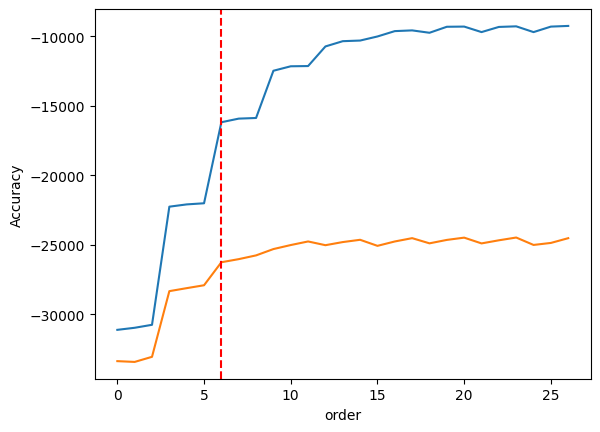

In [16]:
ans['mean_train_score'].plot()
ans['mean_test_score'].plot()
plt.xlabel('order')
plt.ylabel('Accuracy')
plt.axvline(x=6,linestyle='--', color='r')
plt.show()

In [17]:
ans['params'][6]

{'max_depth': 7, 'n_estimators': 30}

In [18]:
rf.set_params(max_depth=7, n_estimators=30)
rf.fit(transformed_df, Ames.SalePrice)

,n_estimators,30
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
model_importance = pd.Series(rf.feature_importances_, index=transformed_df.columns).sort_values(ascending=False)

model_importance.head(10)

TotalSF         0.347977
OverallQual     0.283466
QualBin_high    0.193450
HouseAge        0.016607
YearBuilt       0.010082
TotalBaths      0.008607
2ndFlrSF        0.008184
YearRemodAdd    0.008009
1stFlrSF        0.007376
LotArea         0.007134
dtype: float64

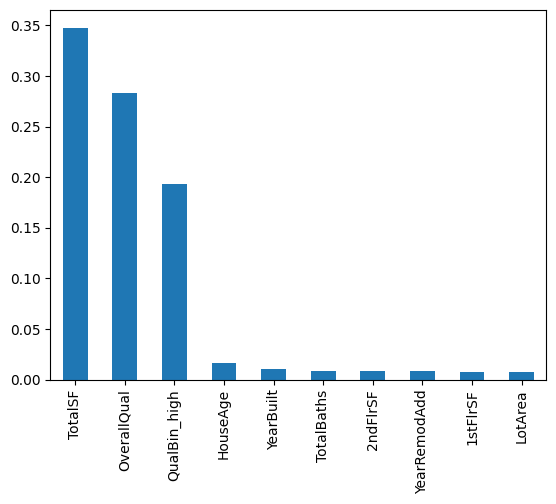

In [20]:
model_importance.head(10).plot(kind="bar")
plt.show()

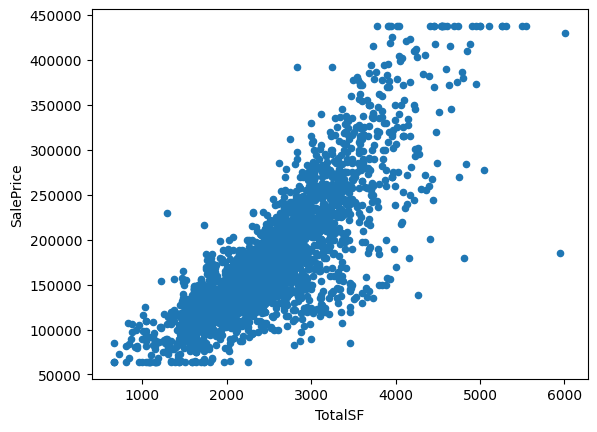

In [22]:
X[[model_importance.index[0], 'SalePrice']].plot(kind='scatter', x=model_importance.index[0], y='SalePrice')
plt.show()

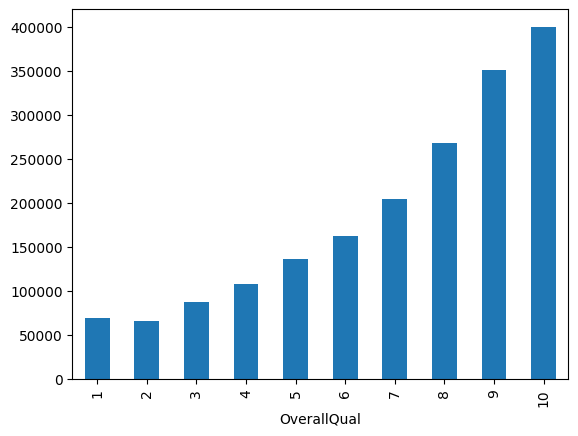

In [23]:
X.groupby(model_importance.index[1])['SalePrice'].mean().plot(kind="bar")
plt.show()

In [471]:
X = transformed_df.copy()

# ---- 1. Define which numeric columns to log-transform ----
log_cols = [
    "LotArea", "LotFrontage", "MasVnrArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
    "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "TotalSF", "GrLivArea_per_LotArea", "TotalPorchSF"
]

# Keep only columns that actually exist in X
log_cols = [c for c in log_cols if c in X.columns]

# ---- 2. Define full numeric scaling list ----
scale_features = [
    # Continuous
    "GrLivArea", "LotFrontage", "LotArea", "MasVnrArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GarageArea",
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
    "ScreenPorch", "PoolArea", "MiscVal", "TotalSF", "GrLivArea_per_LotArea", "TotalPorchSF",

    # Counts
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
    "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd",
    "Fireplaces", "GarageCars", "TotalBaths",

    # Ordinal-as-numeric
    "OverallQual", "OverallCond",

    # Year variables (or replace with "age")
    "YearBuilt",
    "YearRemodAdd",
    "GarageYrBlt",
    "HouseAge",
    "HouseAgeSinceRemod",
    "GarageAge"
]

scale_features = [c for c in scale_features if c in X.columns]

# ---- 3. Apply log transform first, then scale ----
X_num = X[scale_features].copy()
X_num[log_cols] = X_num[log_cols].apply(np.log1p)

scaler = StandardScaler()
X_scaled_num = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=scale_features,
    index=X.index
)

# ---- 4. Combine back with one-hot columns ----
onehot_cols = [c for c in X.columns if c not in scale_features]
X_final = pd.concat([X_scaled_num, X[onehot_cols]], axis=1)

target_scaled = np.log1p(Ames.SalePrice)

In [126]:
# Descriptive statistics for numerical columns
print(X_final.describe())

          GrLivArea   LotFrontage       LotArea    MasVnrArea    BsmtFinSF1  \
count  2.580000e+03  2.580000e+03  2.580000e+03  2.580000e+03  2.580000e+03   
mean  -7.959180e-16  1.936091e-15  3.924509e-15 -2.382246e-16 -8.124423e-17   
std    1.000194e+00  1.000194e+00  1.000194e+00  1.000194e+00  1.000194e+00   
min   -2.357390e+00 -3.436400e+00 -3.333658e+00 -7.951654e-01 -1.480607e+00   
25%   -7.572399e-01 -2.608717e-01 -3.451131e-01 -7.951654e-01 -1.480607e+00   
50%    5.544383e-02  1.460487e-01  1.331125e-01 -7.951654e-01  5.508053e-01   
75%    6.530267e-01  5.442701e-01  5.402550e-01  1.143857e+00  7.700324e-01   
max    2.190640e+00  4.841112e+00  2.640829e+00  2.030826e+00  1.158512e+00   

         BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF      2ndFlrSF  \
count  2.580000e+03  2.580000e+03  2.580000e+03  2.580000e+03  2.580000e+03   
mean   3.855658e-17 -2.093072e-16  6.637240e-16  2.071039e-15  1.404561e-16   
std    1.000194e+00  1.000194e+00  1.000194e+00  1.

In [60]:
def univariate_linreg_statsmodels(
    X: pd.DataFrame,
    y: pd.Series,
    *,
    log_target: bool = False
) -> pd.DataFrame:
    """
    Runs separate OLS for each single feature vs. y.
    If log_target=True, fits on log1p(y) and reports RMSE in dollars (back-transformed).
    Coefficients and intercept are reported in the model's native space
    (log-price when log_target=True; raw dollars otherwise).
    """
    rows = []
    y_array = np.asarray(y)
    y_trainable = np.log1p(y_array) if log_target else y_array  # training target

    for col in X.columns:
        x = X[[col]]
        if np.allclose(x.values.std(), 0):
            # constant feature: skip fit/metrics
            rows.append({
                "feature": col,
                "r2": np.nan,
                "rmse": np.nan,
                "coef": 0.0,
                "intercept": float(np.mean(y_trainable)),
                "p_value": np.nan,
                "coef_ci_low": np.nan,
                "coef_ci_high": np.nan,
                "fitted_on_log_target": bool(log_target)
            })
            continue

        Xc = sm.add_constant(x, has_constant="add")
        model = sm.OLS(y_trainable, Xc).fit()

        # Predictions in training space
        y_pred_train_space = model.predict(Xc)

        # RMSE: report in dollars if we trained in log space
        if log_target:
            y_pred_dollars = np.expm1(y_pred_train_space)
            rmse = float(np.sqrt(((y_array - y_pred_dollars) ** 2).mean()))
        else:
            rmse = float(np.sqrt(((y_array - y_pred_train_space) ** 2).mean()))

        coef = float(model.params[col])
        ci_low, ci_high = model.conf_int().loc[col].tolist()
        p = float(model.pvalues[col])

        rows.append({
            "feature": col,
            "r2": float(model.rsquared),
            "rmse": rmse,
            "coef": coef,
            "intercept": float(model.params["const"]),
            "p_value": p,
            "coef_ci_low": float(ci_low),
            "coef_ci_high": float(ci_high),
            "fitted_on_log_target": bool(log_target)
        })

    out = pd.DataFrame(rows).sort_values("r2", ascending=False).reset_index(drop=True)
    return out

In [392]:
results_df = univariate_linreg_statsmodels(X_final, Ames.SalePrice, log_target=True)


results_df[results_df["feature"].isin(["HalfBath","FullBath"])]

print(results_df[results_df["feature"] == "HalfBath"]["coef"].iloc[0] / 
      results_df[results_df["feature"] == "FullBath"]["coef"].iloc[0])
print(results_df[results_df["feature"] == "BsmtHalfBath"]["coef"].iloc[0] / 
      results_df[results_df["feature"] == "BsmtFullBath"]["coef"].iloc[0])

results_df[results_df["feature"] == "BsmtHalfBath"]["coef"].iloc[0]

0.5385434900519234
-0.09157728286002267


np.float64(-0.009776605860975852)

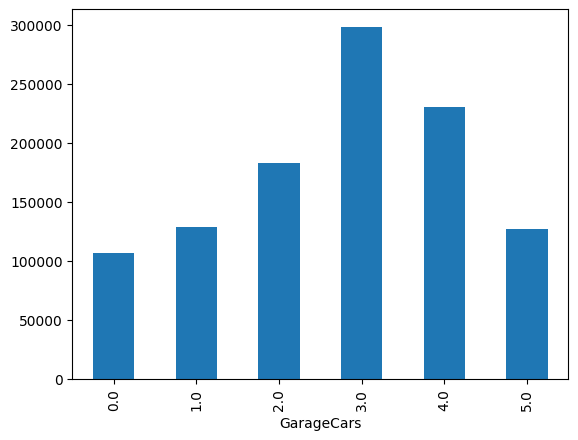

In [28]:
Ames.groupby(results_df.feature[3])['SalePrice'].mean().plot(kind="bar")
plt.show()

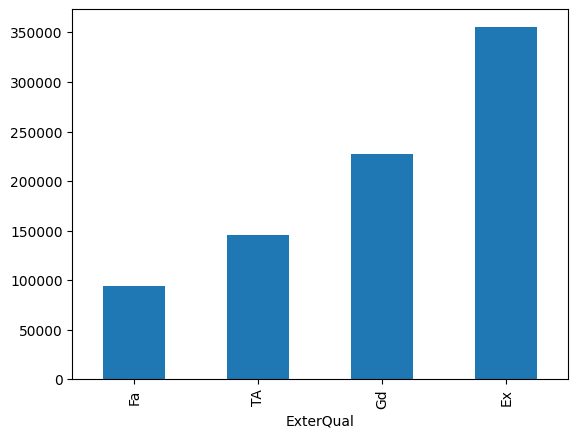

In [29]:
Ames.groupby(results_df.feature[4])['SalePrice'].mean().sort_values().plot(kind="bar")
plt.show()

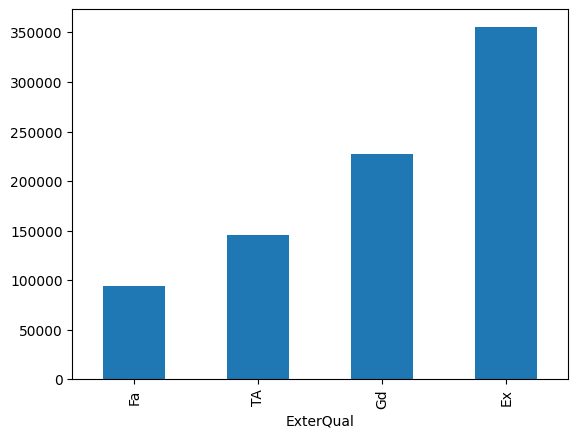

In [29]:
Ames.groupby(results_df.feature[4])['SalePrice'].mean().sort_values().plot(kind="bar")
plt.show()

In [64]:


# --- Helpers ---
def rmse_compat(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)  # works across sklearn versions
    return float(np.sqrt(mse))

def get_feature_names(X):
    if hasattr(X, "columns"):
        return list(X.columns)
    return [f"x{i}" for i in range(X.shape[1])]

# --- Main ---
def fit_multiple_linreg_all_features(
    X, y, *, test_size=0.2, random_state=42, n_splits=5, log_target=False
):
    """
    X: preprocessed feature matrix (DataFrame or ndarray), no NaNs
    y: target Series/array (SalePrice)
    log_target: if True, fits on log1p(y) and reports back-transformed RMSE too
    """
    feature_names = get_feature_names(X)

    # Target transform (optional)
    if log_target:
        y_trainable = np.log1p(y)
    else:
        y_trainable = np.asarray(y)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_trainable, test_size=test_size, random_state=random_state
    )

    # Fit
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Predict
    y_pred_test = lr.predict(X_test)
    y_pred_train = lr.predict(X_train)

    # Metrics (in target space)
    if log_target:
        # Back-transform for error metrics in dollars
        y_test_dollars = np.expm1(y_test)
        y_pred_test_dollars = np.expm1(y_pred_test)
        test_rmse = rmse_compat(y_test_dollars, y_pred_test_dollars)
        test_r2 = r2_score(y_test_dollars, y_pred_test_dollars)
    else:
        test_rmse = rmse_compat(y_test, y_pred_test)
        test_r2 = float(r2_score(y_test, y_pred_test))

    # Cross-validated RMSE (on full data)
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    neg_mse = cross_val_score(lr, X, y_trainable, scoring="neg_mean_squared_error", cv=cv)
    if log_target:
        # Back-transform each fold's MSE is not available; report in log space as approx
        cv_rmse = float(np.sqrt(-neg_mse).mean())
        cv_rmse_std = float(np.sqrt(-neg_mse).std())
    else:
        cv_rmse = float(np.sqrt(-neg_mse).mean())
        cv_rmse_std = float(np.sqrt(-neg_mse).std())

    # Coefficients
    coef_df = pd.DataFrame({
        "feature": feature_names,
        "coef": lr.coef_,
        "abs_coef": np.abs(lr.coef_)
    }).sort_values("abs_coef", ascending=False).reset_index(drop=True)

    metrics = {
        "test_rmse": test_rmse,
        "test_r2": test_r2,
        "cv_rmse_mean": cv_rmse,
        "cv_rmse_std": cv_rmse_std,
        "intercept": float(lr.intercept_),
        "fitted_on_log_target": bool(log_target),
    }

    # Also return out-of-sample predictions (useful for residual checks)
    outputs = {
        "y_test_pred": y_pred_test if not log_target else y_pred_test_dollars,
        "y_test_true": y_test if not log_target else y_test_dollars,
    }

    return lr, coef_df, metrics, outputs

In [101]:
lr, coef_df, metrics, out = fit_multiple_linreg_all_features(X_final, Ames["SalePrice"], log_target=True)

In [102]:
print(metrics)

{'test_rmse': 20987.029752800558, 'test_r2': 0.9176448928145764, 'cv_rmse_mean': 0.10122483859088219, 'cv_rmse_std': 0.006142720828758496, 'intercept': 10.83499988039528, 'fitted_on_log_target': True}


In [33]:
residuals = pd.Series(out["y_test_true"] - out["y_test_pred"], name="residuals")

In [34]:
def coef_to_pct_change(coef_df):
    df_pct = coef_df.copy()
    df_pct["pct_change"] = (np.exp(df_pct["coef"]) - 1) * 100
    return df_pct[["feature", "coef", "pct_change"]].sort_values(
        "pct_change", key=abs, ascending=False
    ).reset_index(drop=True)

coef_pct_df = coef_to_pct_change(coef_df)

# coef_pct_df must already have columns: ["feature", "coef", "pct_change"]
# X_final is your design matrix used to fit the model

def is_one_hot(col: pd.Series) -> bool:
    vals = pd.unique(col.dropna())
    # allow 0/1 in int or float form
    return set(np.asarray(vals)).issubset({0, 1, 0.0, 1.0})

# 1) Annotate feature type + counts/coverage
feature_types = {}
counts = {}
pct_of_data = {}

n = len(X_final)

for feat in coef_pct_df["feature"]:
    if feat in X_final.columns:
        if is_one_hot(X_final[feat]):
            feature_types[feat] = "one-hot categorical"
            counts[feat] = int(X_final[feat].sum())
            pct_of_data[feat] = (counts[feat] / n) * 100.0
        else:
            feature_types[feat] = "numeric"
            counts[feat] = None
            pct_of_data[feat] = 100.0  # numeric features apply to all rows
    else:
        feature_types[feat] = "unknown"
        counts[feat] = None
        pct_of_data[feat] = np.nan

coef_pct_df["feature_type"] = coef_pct_df["feature"].map(feature_types)
coef_pct_df["count"] = coef_pct_df["feature"].map(counts)
coef_pct_df["pct_of_data"] = coef_pct_df["feature"].map(pct_of_data)

def rarity_label(row):
    if row["feature_type"] == "numeric":
        return "Numeric (N/A)"
    if pd.isna(row["pct_of_data"]):
        return "N/A"
    if row["pct_of_data"] < 1:
        return "Very rare (<1%)"
    if row["pct_of_data"] < 5:
        return "Rare (1–5%)"
    return "Common (≥5%)"

coef_pct_df["rarity"] = coef_pct_df.apply(rarity_label, axis=1)

# Sort by absolute % change
coef_pct_df = coef_pct_df.sort_values("pct_change", key=np.abs, ascending=False).reset_index(drop=True)

# 2) Filter to "common": numeric OR ≥ 5% coverage
common_mask = (coef_pct_df["feature_type"] == "numeric") | (coef_pct_df["pct_of_data"] >= 5)
common_coef_df = (
    coef_pct_df.loc[common_mask, ["feature", "feature_type", "pct_change", "count", "pct_of_data", "rarity"]]
    .sort_values("pct_change", key=np.abs, ascending=False)
    .reset_index(drop=True)
)

print("=== FULL LIST WITH RARITY ===")
display(coef_pct_df[["feature", "feature_type", "pct_change", "count", "pct_of_data", "rarity"]])

print("\n=== COMMON FEATURES (numeric OR ≥5% one-hot) ===")
display(common_coef_df)

=== FULL LIST WITH RARITY ===


,feature,feature_type,pct_change,count,pct_of_data,rarity
0,Neighborhood_GrnHill,one-hot categorical,4.536042e+01,2.0,0.077519,Very rare (<1%)
1,Condition2_PosN,one-hot categorical,-3.005731e+01,3.0,0.116279,Very rare (<1%)
2,MSSubClass_150,one-hot categorical,-2.228443e+01,1.0,0.038760,Very rare (<1%)
3,Exterior1st_PreCast,one-hot categorical,2.217233e+01,1.0,0.038760,Very rare (<1%)
4,Exterior2nd_PreCast,one-hot categorical,2.217233e+01,1.0,0.038760,Very rare (<1%)
...,...,...,...,...,...,...
253,Heating_Floor,one-hot categorical,4.440892e-14,1.0,0.038760,Very rare (<1%)
254,MSZoning_A (agr),one-hot categorical,0.000000e+00,1.0,0.038760,Very rare (<1%)
255,RoofMatl_Membran,one-hot categorical,0.000000e+00,1.0,0.038760,Very rare (<1%)
256,Neighborhood_Landmrk,one-hot categorical,0.000000e+00,1.0,0.038760,Very rare (<1%)



=== COMMON FEATURES (numeric OR ≥5% one-hot) ===


,feature,feature_type,pct_change,count,pct_of_data,rarity
0,Utilities,numeric,21.433810,NaN,100.000000,Numeric (N/A)
1,GrLivArea,numeric,10.486860,NaN,100.000000,Numeric (N/A)
2,Neighborhood_Edwards,one-hot categorical,-8.774969,165.0,6.395349,Common (≥5%)
3,MSSubClass_50,one-hot categorical,8.093026,259.0,10.038760,Common (≥5%)
4,LotArea,numeric,7.622406,NaN,100.000000,Numeric (N/A)
...,...,...,...,...,...,...
119,MasVnrType_BrkFace,one-hot categorical,-0.066859,804.0,31.162791,Common (≥5%)
120,BldgType_TwnhsE,one-hot categorical,0.043881,202.0,7.829457,Common (≥5%)
121,YrSold_2008,one-hot categorical,0.043177,564.0,21.860465,Common (≥5%)
122,Electrical,numeric,0.036406,NaN,100.000000,Numeric (N/A)


In [67]:
RANDOM_STATE = 42
CV_FOLDS = 5

# =========================
# 1) Utilities
# =========================
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def cv_eval_models(X, y, models, *, cv=CV_FOLDS, log_target=False, random_state=RANDOM_STATE):
    """
    Cross-validated evaluation with optional log-target training and dollar-scale metrics.

    Returns a DataFrame with:
      - cv_rmse_mean / cv_rmse_std  (in $)
      - r2_cv   (OOF R², in $)
      - r2_full (fit-on-all-data R², in $)
    """
    y_np = y.to_numpy() if hasattr(y, "to_numpy") else np.asarray(y)
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    rows = []
    for name, model in models:
        fold_rmses = []
        oof_pred = np.zeros(len(y_np), dtype=float)

        for tr_idx, va_idx in kf.split(X):
            X_tr, X_va = (X.iloc[tr_idx], X.iloc[va_idx]) if hasattr(X, "iloc") else (X[tr_idx], X[va_idx])
            y_tr, y_va = y_np[tr_idx], y_np[va_idx]

            y_tr_used = np.log1p(y_tr) if log_target else y_tr
            model.fit(X_tr, y_tr_used)

            y_va_pred = model.predict(X_va)
            if log_target:
                y_va_pred = np.expm1(y_va_pred)

            fold_rmses.append(rmse(y_va, y_va_pred))
            oof_pred[va_idx] = y_va_pred

        r2_cv = r2_score(y_np, oof_pred)

        # Full-fit R² in $-space
        y_full_used = np.log1p(y_np) if log_target else y_np
        model.fit(X, y_full_used)
        y_full_pred = model.predict(X)
        if log_target:
            y_full_pred = np.expm1(y_full_pred)
        r2_full = r2_score(y_np, y_full_pred)

        rows.append({
            "model": name,
            "cv_rmse_mean": float(np.mean(fold_rmses)),
            "cv_rmse_std":  float(np.std(fold_rmses, ddof=0)),
            "r2_cv":  float(r2_cv),
            "r2_full": float(r2_full),
        })

    return pd.DataFrame(rows).sort_values("cv_rmse_mean").reset_index(drop=True)

# =========================
# 2) Penalized models: fit + interpretable coefs
# =========================
from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV
from sklearn.model_selection import KFold

def evaluate_penalized_models_stable(
    X, y, *,
    log_target=True,
    random_state=RANDOM_STATE,
    top_n=50,
    min_pct=5.0,
    include_full=False
):
    """
    Fits RidgeCV, LassoCV, ElasticNetCV. Returns metrics and filtered coef tables
    with % change (if log_target), feature types, and coverage.
    Keeps all numeric features and one-hot features present in ≥ min_pct of homes.
    """
    y_array = np.asarray(y)
    y_trainable = np.log1p(y_array) if log_target else y_array

    cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
    alphas = np.logspace(-3, 3, 50)
    # alphas = np.logspace(-4, 4, 80)
    l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

    ridge = RidgeCV(alphas=alphas, cv=cv, scoring="neg_mean_squared_error").fit(X, y_trainable)
    lasso = LassoCV(alphas=alphas, cv=cv, random_state=random_state, max_iter=100_000, tol=1e-3).fit(X, y_trainable)
    enet  = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=cv,
                         random_state=random_state, max_iter=100_000, tol=1e-3).fit(X, y_trainable)

    def _metrics(name, model, y_true, y_pred_train_space):
        if log_target:
            y_pred = np.expm1(y_pred_train_space)
            return {"model": name,
                    "alpha": getattr(model, "alpha_", None),
                    "l1_ratio": getattr(model, "l1_ratio_", None),
                    "rmse": rmse(y_true, y_pred),
                    "r2": float(r2_score(y_true, y_pred))}
        else:
            return {"model": name,
                    "alpha": getattr(model, "alpha_", None),
                    "l1_ratio": getattr(model, "l1_ratio_", None),
                    "rmse": rmse(y_true, y_pred_train_space),
                    "r2": float(r2_score(y_true, y_pred_train_space))}

    results = pd.DataFrame([
        _metrics("Ridge",      ridge, y_array, ridge.predict(X)),
        _metrics("Lasso",      lasso, y_array, lasso.predict(X)),
        _metrics("ElasticNet", enet,  y_array, enet.predict(X)),
    ])

    # coef tables
    feats = list(X.columns) if hasattr(X, "columns") else [f"x{i}" for i in range(X.shape[1])]

    def _coef_table(model):
        coef = np.asarray(model.coef_)
        df = pd.DataFrame({"feature": feats, "coef": coef})
        df["abs_coef"] = df["coef"].abs()
        return df.sort_values("abs_coef", ascending=False).head(top_n).reset_index(drop=True)

    raw_tables = {"Ridge": _coef_table(ridge), "Lasso": _coef_table(lasso), "ElasticNet": _coef_table(enet)}

    # feature typing & coverage
    def _is_one_hot(col: pd.Series) -> bool:
        vals = pd.unique(col.dropna())
        return set(np.asarray(vals)).issubset({0, 1, 0.0, 1.0})

    if hasattr(X, "columns"):
        n = len(X)
        is_dummy = {c: _is_one_hot(X[c]) for c in X.columns}
        coverage = {}
        for c in X.columns:
            if is_dummy[c]:
                col = X[c]
                # robust if any scaling slipped in
                cov = (col > 0.5).mean() if (np.issubdtype(col.dtype, np.number) and (col.max() > 1 or col.min() < 0)) else col.mean()
                coverage[c] = float(cov) * 100.0
            else:
                coverage[c] = 100.0
    else:
        is_dummy, coverage = {}, {}

    def _augment_and_filter(df):
        out = df.copy()
        out["pct_change"] = (np.exp(out["coef"]) - 1.0) * 100.0 if log_target else np.nan
        if hasattr(X, "columns"):
            out["feature_type"] = out["feature"].map(lambda f: "one-hot categorical" if is_dummy.get(f, False) else "numeric")
            out["pct_of_data"]  = out["feature"].map(lambda f: coverage.get(f, np.nan))
        else:
            out["feature_type"] = "unknown"; out["pct_of_data"] = np.nan
        mask = (out["feature_type"] == "numeric") | (out["pct_of_data"] >= min_pct)
        out = out[mask].copy()
        out = out.reindex(out[( "pct_change" if log_target else "abs_coef")].abs().sort_values(ascending=False).index)
        return out.reset_index(drop=True)

    filtered_tables = {name: _augment_and_filter(df) for name, df in raw_tables.items()}

    if include_full:
        return results, filtered_tables, raw_tables
    else:
        return results, filtered_tables

# =========================
# 3) Consensus table & plot (penalized models)
# =========================
def build_consensus_table(ridge_df: pd.DataFrame,
                          lasso_df: pd.DataFrame,
                          enet_df: pd.DataFrame,
                          min_models: int = 2) -> pd.DataFrame:
    def _prep(df, tag):
        return df[["feature", "feature_type", "pct_change", "pct_of_data"]].rename(
            columns={"pct_change": f"{tag}_pct", "pct_of_data": f"{tag}_pct_of_data"}
        )
    merged = _prep(ridge_df, "Ridge").merge(_prep(lasso_df, "Lasso"), on=["feature","feature_type"], how="outer") \
                                     .merge(_prep(enet_df, "ElasticNet"), on=["feature","feature_type"], how="outer")
    model_cols = ["Ridge_pct", "Lasso_pct", "ElasticNet_pct"]
    merged["n_models"] = merged[model_cols].notna().sum(axis=1)
    merged = merged[merged["n_models"] >= min_models].copy()
    merged["avg_pct_change"] = merged[model_cols].mean(axis=1, skipna=True)
    merged["std_pct_change"] = merged[model_cols].std(axis=1, ddof=0, skipna=True)
    coverage_cols = ["Ridge_pct_of_data", "Lasso_pct_of_data", "ElasticNet_pct_of_data"]
    merged["pct_of_data"] = merged[coverage_cols].max(axis=1, skipna=True)
    return merged.sort_values("avg_pct_change", key=lambda s: s.abs(), ascending=False).reset_index(drop=True)

def plot_consensus_bar(consensus_df: pd.DataFrame, top_n: int = 15, with_errorbars: bool = True, figsize=(9,6),
                       title="Consensus Feature Importance (Penalized Models)"):
    df = consensus_df.head(top_n).copy().sort_values("avg_pct_change", ascending=True)
    plt.figure(figsize=figsize)
    bars = plt.barh(df["feature"], df["avg_pct_change"])
    for b, val in zip(bars, df["avg_pct_change"]):
        b.set_color("tab:red" if val < 0 else "tab:green")
    if with_errorbars and "std_pct_change" in df.columns:
        x = df["avg_pct_change"].values
        err = df["std_pct_change"].fillna(0).values
        y = np.arange(len(df))
        plt.errorbar(x, y, xerr=err, fmt="none", ecolor="gray", capsize=3, linewidth=1)
    plt.axvline(0, color="black", lw=0.8)
    plt.xlabel("Average % Change in Price (per 1 SD or category)")
    plt.ylabel("Feature")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# =========================
# 4) Models & example usage
# =========================
# NOTE:
# - Use X_final (scaled numerics) for linear models; use X_raw (unscaled) for trees if you have it.
# - y_final should be RAW SalePrice; set log_target=True to train in log space with $-scale metrics.

alphas = np.logspace(-3, 1, 40)
l1_grid = [0.1, 0.3, 0.5, 0.7, 0.9]

# models = [
#     ("Ridge",        Ridge(alpha=14.56)),
#     ("LassoCV",      LassoCV(alphas=alphas, cv=CV_FOLDS, max_iter=100_000, tol=1e-3, n_jobs=-1)),
#     ("ElasticNetCV", ElasticNetCV(alphas=alphas, l1_ratio=l1_grid, cv=CV_FOLDS, max_iter=100_000, tol=1e-3, random_state=RANDOM_STATE)),
#     ("RandomForest", RandomForestRegressor(n_estimators=500, random_state=RANDOM_STATE, n_jobs=1)),  # avoid nested parallel
#     ("HistGB",       HistGradientBoostingRegressor(random_state=RANDOM_STATE)),
#     ("SVR",          SVR(kernel='rbf', C=10, epsilon=0.2)),
# ]


models = [
    ("Ridge",        RidgeCV(alphas=alphas, cv=CV_FOLDS, scoring="neg_mean_squared_error")),
    ("LassoCV",      LassoCV(alphas=alphas, cv=CV_FOLDS, max_iter=100_000, tol=1e-3, n_jobs=-1)),
    ("ElasticNetCV", ElasticNetCV(alphas=alphas, l1_ratio=l1_grid, cv=CV_FOLDS, max_iter=100_000, tol=1e-3, random_state=RANDOM_STATE)),
]

In [ ]:
FULL RUN

In [472]:

# --- Penalized models + consensus (log target recommended) ---
results_df, coef_tables = evaluate_penalized_models_stable(X_final, Ames["SalePrice"], log_target=True, min_pct=5, top_n=200)
print(results_df)

y_final = Ames["SalePrice"]

s= time.time()
print("\n=== LOG target leaderboard ===")
print(cv_eval_models(X_final, y_final, models, cv=CV_FOLDS, log_target=True,  random_state=RANDOM_STATE).to_string(index=False))

print((time.time() -s), 'sec')

        model      alpha  l1_ratio          rmse        r2
0       Ridge  19.306977       NaN  16791.977915  0.944181
1       Lasso   0.001000       NaN  18903.756991  0.929259
2  ElasticNet   0.001000       0.1  16523.205812  0.945954

=== LOG target leaderboard ===
       model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
ElasticNetCV  18660.953790  2118.304054 0.930176 0.942817
       Ridge  18677.015398  2254.998977 0.929939 0.944433
     LassoCV  18769.926450  2187.047911 0.929310 0.939817
30.426517009735107 sec


In [475]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
# uses your existing: cv_eval_models(X, y, models, ...)

t0 = time.time()
RANDOM_STATE = 42
CV_OUTER = 10  # outer folds in your cv_eval_models

# --- compact, targeted inner search spaces ---
ridge_alphas = np.linspace(8, 20, 13)              # around your best ~12
lasso_alphas = np.r_[np.logspace(-4, -3, 5),       # 1e-4 … 1e-3
                     np.linspace(0.0012, 0.01, 8)] # densify near prior best
enet_alphas  = lasso_alphas
enet_l1      = [0.2, 0.4, 0.6]                     # slim but representative
# enet_l1 = np.linspace(0.2, 0.9, 8)  # denser sweep

# --- fast inner CV configs ---
ridge_fast = RidgeCV(alphas=ridge_alphas, cv=None)  # GCV = fast & accurate
inner5 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

lasso_fast = LassoCV(
    alphas=lasso_alphas, cv=inner5,
    max_iter=100_000, tol=1e-3, random_state=RANDOM_STATE, n_jobs=-1
)

enet_fast  = ElasticNetCV(
    alphas=enet_alphas, l1_ratio=enet_l1, cv=inner5,
    max_iter=100_000, tol=1e-3, random_state=RANDOM_STATE, n_jobs=-1
)

models = [
    ("Ridge",        ridge_fast),
    ("LassoCV",      lasso_fast),
    ("ElasticNetCV", enet_fast),
]

print("\n=== LOG target leaderboard (lean inner-CV) ===")
print(cv_eval_models(X_final, Ames["SalePrice"], models, cv=CV_OUTER, log_target=True,
                     random_state=RANDOM_STATE).to_string(index=False))

print(f"\nElapsed: {(time.time()-t0):.2f} sec")


=== LOG target leaderboard (lean inner-CV) ===
       model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
       Ridge  18496.588246  2776.502601 0.930747 0.944433
ElasticNetCV  18569.840548  2673.163752 0.930321 0.942817
     LassoCV  18583.714239  2676.579991 0.930216 0.939817

Elapsed: 51.12 sec


In [474]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet

t0 = time.time()
RANDOM_STATE = 42
CV_OUTER = 10  # outer CV in your cv_eval_models

# ---- ultra-fast inner search spaces ----
# Ridge tends to like larger alphas; GCV is fast and stable
ridge_alphas = np.logspace(0.8, 1.5, 12)   # ~6.3 to ~31.6

# L1-family usually likes smaller alphas on standardized X
lasso_alphas = np.logspace(-5, -3, 7)      # 1e-5 … 1e-3 (tiny, focused)
enet_alphas  = lasso_alphas
enet_l1      = [0.1, 0.2, 0.4, 0.6]        # slim but representative

# ---- inner CV configs (small for speed) ----
inner3 = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

ridge_fast = RidgeCV(alphas=ridge_alphas, cv=None, scoring="neg_mean_squared_error")

lasso_fast = LassoCV(
    alphas=lasso_alphas, cv=inner3,
    max_iter=150_000, tol=1e-3,
    random_state=RANDOM_STATE, n_jobs=-1, selection="cyclic"
)

enet_fast  = ElasticNetCV(
    alphas=enet_alphas, l1_ratio=enet_l1, cv=inner3,
    max_iter=150_000, tol=1e-3,
    random_state=RANDOM_STATE, n_jobs=-1, selection="cyclic"
)

models = [
    ("Ridge",        ridge_fast),
    ("LassoCV",      lasso_fast),
    ("ElasticNetCV", enet_fast),
]

print("\n=== LOG target leaderboard (FAST tuner) ===")
print(cv_eval_models(
    X_final, Ames["SalePrice"], models,
    cv=CV_OUTER, log_target=True, random_state=RANDOM_STATE
).to_string(index=False))

print(f"\nElapsed: {(time.time()-t0):.2f} sec")


=== LOG target leaderboard (FAST tuner) ===
       model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
       Ridge  18500.890789  2784.025268 0.930708 0.944513
ElasticNetCV  18543.034775  2657.959750 0.930534 0.943895
     LassoCV  18599.880192  2673.112227 0.930100 0.943332

Elapsed: 63.68 sec


In [305]:
df = Ames.copy()

df = ames_df[ames_df["RanchColonial"].isin(["Ranch", "Colonial"])].copy()
df["LogPrice"] = np.log1p(df["SalePrice"])

import statsmodels.formula.api as smf

formula = "LogPrice ~ C(RanchColonial) + OverallQual + GrLivArea + GarageCars + FullBath"
model = smf.ols(formula, data=df).fit()
print(model.summary())

coef = model.params["C(RanchColonial)[T.Ranch]"]
print(f"Ranch vs Colonial: Ranch homes sell for ~{(np.exp(coef)-1)*100:.1f}% less, controlling for features.")

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2258.
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:15:27   Log-Likelihood:                 1040.2
No. Observations:                2276   AIC:                            -2068.
Df Residuals:                    2270   BIC:                            -2034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [306]:
# Which of the house styles, ranch or colonial, is more popular in terms of the house prices?

import statsmodels.formula.api as smf

# Filter Ranch vs Colonial
df = ames_df[ames_df["RanchColonial"].isin(["Ranch", "Colonial"])].copy()
df["LogPrice"] = np.log1p(df["SalePrice"])

formula = """
LogPrice ~ C(RanchColonial)
+ OverallQual + OverallCond
+ GrLivArea + TotalBsmtSF + LotArea
+ FullBath + HalfBath + BedroomAbvGr
+ GarageCars + GarageArea
+ YearBuilt + YearRemodAdd
+ C(Neighborhood)
"""

model = smf.ols(formula, data=df).fit(cov_type="HC3")  # robust SEs
print(model.summary())

coef = model.params["C(RanchColonial)[T.Ranch]"]
print(f"\nRanch vs Colonial (expanded controls): Ranch homes sell for ~{(np.exp(coef)-1)*100:.1f}% less, controlling for features.")

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1498.
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:17:14   Log-Likelihood:                 1800.9
No. Observations:                2275   AIC:                            -3520.
Df Residuals:                    2234   BIC:                            -3285.
Df Model:                          40                                         
Covariance Type:                  HC3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [478]:
df_nc = ames_df[
    (ames_df["HouseStyle"] != "1Story") &
    (ames_df["RanchColonial"].isin(["Colonial", "Ranch"]))
].copy()

df_nc = df_nc.rename(columns={"2ndFlrSF": "SecondFlrSF"})

import statsmodels.formula.api as smf

model = smf.ols(
    formula="SalePrice ~ SecondFlrSF * RanchColonial",
    data=df_nc
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     226.9
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          6.69e-112
Time:                        14:40:56   Log-Likelihood:                -12154.
No. Observations:                 989   AIC:                         2.432e+04
Df Residuals:                     985   BIC:                         2.434e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 1.526e+05   2327.541     65.566      0.000    1.48e+05    1.57e+05
C(RanchColonial)[T.Colonial]             -1.123e+05   9253.165    -12.132      0.000    -1.3e+05   -9.41e+04
SecondFlrSF                                 37.8627      8.802      4.301      0.000      20.610      55.115
SecondFlrSF:C(RanchColonial)[T.Colonial]   146.9682     13.766     10.676      0.000     119.987     173.949

--- Price sensitivity to SecondFlrSF (simple linear OLS, robust SE) ---
Ranch:     $38 per additional 2nd-floor sqft  (p = 0.0000)
Colonial:  $185 per additional 2nd-floor sqft
Difference (Colonial − Ranch) driven by interaction term p = 0.0000

Interpretation: Colonials are significantly more sensitive to 2nd-floor area than Ranch homes.


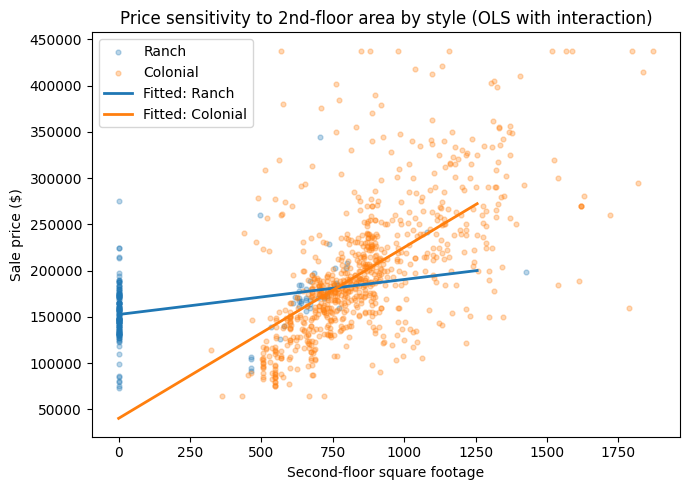

In [324]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.contrast import ContrastResults

# ---- 0) Prep: copy, rename col with a safe name for formulas, filter to 2+ story ----
df = ames_df.copy()
if "2ndFlrSF" in df.columns:
    df = df.rename(columns={"2ndFlrSF": "SecondFlrSF"})

# keep only non-1Story homes and rows we need
need_cols = ["SalePrice", "SecondFlrSF", "RanchColonial", "HouseStyle"]
df = df.loc[df["HouseStyle"].ne("1Story"), need_cols].dropna()

# make sure the style column is categorical with Ranch as the baseline (so Colonial is the contrast)
df["RanchColonial"] = pd.Categorical(df["RanchColonial"], categories=["Ranch","Colonial"])

# ---- 1) Fit the interaction model (simple version: no extra controls) ----
# If you want log target instead, change SalePrice -> np.log(SalePrice) and exponentiate interpretations.
model = smf.ols("SalePrice ~ SecondFlrSF * C(RanchColonial)", data=df).fit(cov_type="HC1")  # robust SE

print(model.summary().tables[1])  # coef table only

# ---- 2) Extract slopes by style ----
# Model: SalePrice = b0 + b1*SecondFlrSF + b2*I(Colonial) + b3*SecondFlrSF*I(Colonial) + e
b = model.params
p = model.pvalues

# slope ($ per sqft of SecondFlrSF) for Ranch (baseline)
slope_ranch = b["SecondFlrSF"]
p_ranch     = p["SecondFlrSF"]

# slope for Colonial = b1 + b3
b3_name = "SecondFlrSF:C(RanchColonial)[T.Colonial]"
slope_colonial = b["SecondFlrSF"] + b[b3_name]
# p-value for the interaction term tells you whether the slopes differ
p_inter = p[b3_name]

# ---- 3) Pretty print interpretation ----
def fmt_money(x): 
    return f"${x:,.0f}"

print("\n--- Price sensitivity to SecondFlrSF (simple linear OLS, robust SE) ---")
print(f"Ranch:     {fmt_money(slope_ranch)} per additional 2nd-floor sqft  (p = {p_ranch:.4f})")
print(f"Colonial:  {fmt_money(slope_colonial)} per additional 2nd-floor sqft")
print(f"Difference (Colonial − Ranch) driven by interaction term p = {p_inter:.4f}")

if p_inter < 0.05:
    if slope_colonial > slope_ranch:
        verdict = "Colonials are significantly more sensitive to 2nd-floor area than Ranch homes."
    else:
        verdict = "Colonials are significantly less sensitive to 2nd-floor area than Ranch homes."
else:
    verdict = "No statistically significant evidence that price sensitivity to 2nd-floor area differs by style."

print("\nInterpretation:", verdict)

# ---- 4) (Optional) add a simple visualization of fitted lines ----
try:
    import matplotlib.pyplot as plt
    xs = np.linspace(df["SecondFlrSF"].quantile(0.05), df["SecondFlrSF"].quantile(0.95), 50)
    # fitted lines at mean intercept for each style
    # Ranch: y = b0 + b1*x
    y_ranch = (b["Intercept"] + slope_ranch*xs)
    # Colonial: y = (b0 + b2) + (b1 + b3)*x
    y_col = (b["Intercept"] + b["C(RanchColonial)[T.Colonial]"]) + slope_colonial*xs

    plt.figure(figsize=(7,5))
    plt.scatter(df.loc[df["RanchColonial"]=="Ranch","SecondFlrSF"],
                df.loc[df["RanchColonial"]=="Ranch","SalePrice"], s=12, alpha=0.3, label="Ranch")
    plt.scatter(df.loc[df["RanchColonial"]=="Colonial","SecondFlrSF"],
                df.loc[df["RanchColonial"]=="Colonial","SalePrice"], s=12, alpha=0.3, label="Colonial")
    plt.plot(xs, y_ranch, label="Fitted: Ranch", linewidth=2)
    plt.plot(xs, y_col, label="Fitted: Colonial", linewidth=2)
    plt.xlabel("Second-floor square footage")
    plt.ylabel("Sale price ($)")
    plt.title("Price sensitivity to 2nd-floor area by style (OLS with interaction)")
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception:
    pass

                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 9.468e+04   3.72e+04      2.547      0.011    2.18e+04    1.68e+05
C(RanchColonial)[T.Colonial]             -5.434e+04   3.82e+04     -1.421      0.155   -1.29e+05    2.06e+04
SecondFlrSF                                118.7069     54.027      2.197      0.028      12.816     224.598
SecondFlrSF:C(RanchColonial)[T.Colonial]    66.1240     55.055      1.201      0.230     -41.781     174.029

--- Price sensitivity to SecondFlrSF (simple linear OLS, robust SE) ---
Ranch:     $119 per additional 2nd-floor sqft  (p = 0.0280)
Colonial:  $185 per additional 2nd-floor sqft
Difference (Colonial − Ranch) driven by interaction term p = 0.2297

Interpretation: No statistically significant evidence that price sensitivity to 2nd-floor area dif

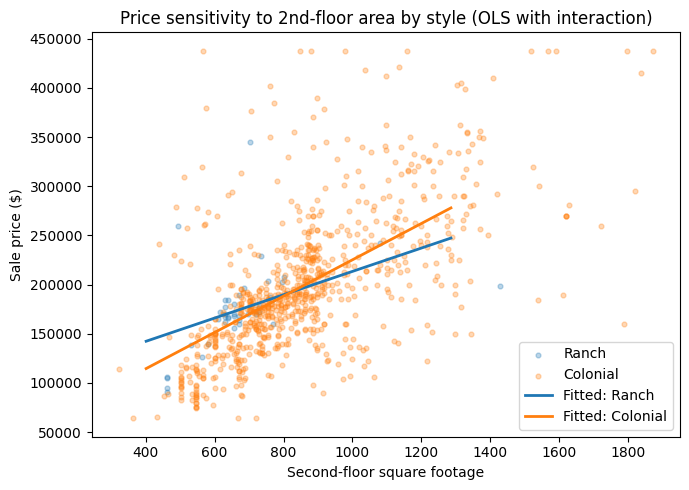

In [404]:
# ---- 0) Prep: copy, rename col with a safe name for formulas, filter ----
df = ames_df.copy()
if "2ndFlrSF" in df.columns:
    df = df.rename(columns={"2ndFlrSF": "SecondFlrSF"})

# keep only non-1Story homes AND those with positive 2nd-floor sqft
need_cols = ["SalePrice", "SecondFlrSF", "RanchColonial", "HouseStyle"]
df = df.loc[(df["HouseStyle"].ne("1Story")) & (df["SecondFlrSF"] > 0), need_cols].dropna()

# make RanchColonial categorical with Ranch baseline
df["RanchColonial"] = pd.Categorical(df["RanchColonial"], categories=["Ranch","Colonial"])

# ---- 1) Fit interaction model ----
model = smf.ols("SalePrice ~ SecondFlrSF * C(RanchColonial)", data=df).fit(cov_type="HC1")

print(model.summary().tables[1])

# ---- 2) Extract slopes by style ----
# Model: SalePrice = b0 + b1*SecondFlrSF + b2*I(Colonial) + b3*SecondFlrSF*I(Colonial) + e
b = model.params
p = model.pvalues

# slope ($ per sqft of SecondFlrSF) for Ranch (baseline)
slope_ranch = b["SecondFlrSF"]
p_ranch     = p["SecondFlrSF"]

# slope for Colonial = b1 + b3
b3_name = "SecondFlrSF:C(RanchColonial)[T.Colonial]"
slope_colonial = b["SecondFlrSF"] + b[b3_name]
# p-value for the interaction term tells you whether the slopes differ
p_inter = p[b3_name]

# ---- 3) Pretty print interpretation ----
def fmt_money(x): 
    return f"${x:,.0f}"

print("\n--- Price sensitivity to SecondFlrSF (simple linear OLS, robust SE) ---")
print(f"Ranch:     {fmt_money(slope_ranch)} per additional 2nd-floor sqft  (p = {p_ranch:.4f})")
print(f"Colonial:  {fmt_money(slope_colonial)} per additional 2nd-floor sqft")
print(f"Difference (Colonial − Ranch) driven by interaction term p = {p_inter:.4f}")

if p_inter < 0.05:
    if slope_colonial > slope_ranch:
        verdict = "Colonials are significantly more sensitive to 2nd-floor area than Ranch homes."
    else:
        verdict = "Colonials are significantly less sensitive to 2nd-floor area than Ranch homes."
else:
    verdict = "No statistically significant evidence that price sensitivity to 2nd-floor area differs by style."

print("\nInterpretation:", verdict)

# ---- 4) (Optional) add a simple visualization of fitted lines ----
try:
    import matplotlib.pyplot as plt
    xs = np.linspace(df["SecondFlrSF"].quantile(0.05), df["SecondFlrSF"].quantile(0.95), 50)
    # fitted lines at mean intercept for each style
    # Ranch: y = b0 + b1*x
    y_ranch = (b["Intercept"] + slope_ranch*xs)
    # Colonial: y = (b0 + b2) + (b1 + b3)*x
    y_col = (b["Intercept"] + b["C(RanchColonial)[T.Colonial]"]) + slope_colonial*xs

    plt.figure(figsize=(7,5))
    plt.scatter(df.loc[df["RanchColonial"]=="Ranch","SecondFlrSF"],
                df.loc[df["RanchColonial"]=="Ranch","SalePrice"], s=12, alpha=0.3, label="Ranch")
    plt.scatter(df.loc[df["RanchColonial"]=="Colonial","SecondFlrSF"],
                df.loc[df["RanchColonial"]=="Colonial","SalePrice"], s=12, alpha=0.3, label="Colonial")
    plt.plot(xs, y_ranch, label="Fitted: Ranch", linewidth=2)
    plt.plot(xs, y_col, label="Fitted: Colonial", linewidth=2)
    plt.xlabel("Second-floor square footage")
    plt.ylabel("Sale price ($)")
    plt.title("Price sensitivity to 2nd-floor area by style (OLS with interaction)")
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception:
    pass


In [480]:
model = ridge_fast
model_name = model.__class__.__name__

model.fit(X_final, np.log1p(Ames["SalePrice"]))  # log target
coef = pd.Series(model.coef_, index=X_final.columns)

beta_full  = coef["FullBath"]
beta_half  = coef["HalfBath"]
beta_full_b  = coef["BsmtFullBath"]
beta_half_b  = coef["BsmtHalfBath"]


mask = (Ames["BsmtQual"].isin(["TA","Gd","Ex"])) & (Ames["BsmtFinSF1"] > 0)
X_sub, y_sub = X_final[mask], Ames.loc[mask, "SalePrice"]

model.fit(X_sub, np.log1p(y_sub))  # log target
coef = pd.Series(model.coef_, index=X_final.columns)

beta_full_mask  = coef["FullBath"]
beta_half_mask  = coef["HalfBath"]
beta_full_b_mask  = coef["BsmtFullBath"]
beta_half_b_mask  = coef["BsmtHalfBath"]


half_weight = beta_half / beta_full if beta_full != 0 else np.nan
half_weight_b = beta_half_b_mask / beta_full_b_mask if beta_full != 0 else np.nan
b_weight = beta_full_b_mask / beta_full if beta_full != 0 else np.nan
b_weight_half = beta_half_b_mask / beta_full
print(model_name + " HalfBath weight vs FullBath:", half_weight)
print(model_name + " Basement HalfBath weight vs Basement FullBath:", half_weight_b)
print(model_name + " Basement FullBath weight vs FullBath:", b_weight)
print(model_name + " Basement HalfBath weight vs FullBath:", b_weight_half)

RidgeCV HalfBath weight vs FullBath: 0.5618140747547741
RidgeCV Basement HalfBath weight vs Basement FullBath: 0.2247784229704327
RidgeCV Basement FullBath weight vs FullBath: 0.8241238942137323
RidgeCV Basement HalfBath weight vs FullBath: 0.18524526927361448


In [8]:
import numpy as np
import pandas as pd
from joblib import parallel_backend
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import (
    HistGradientBoostingRegressor, RandomForestRegressor,
    ExtraTreesRegressor, GradientBoostingRegressor
)

# ---------- helpers ----------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def _make_ttr(est):
    # Train on log1p(y), return predictions in $-space
    return TransformedTargetRegressor(regressor=est, func=np.log1p, inverse_func=np.expm1)

def cv_eval_models_nonlinear(
    X_raw, y, *, cv=5, random_state=42, models=None, use_threads=True
):
    """
    Cross-validated evaluation for NON-LINEAR (tree-based) models on RAW / one-hot features.
    Do NOT standardize numeric features.
    Uses TTR so metrics are in $-space without manual log handling.
    """
    # Ensure dense DataFrame/ndarray for HGB; convert sparse to dense once if needed
    if hasattr(X_raw, "toarray"):
        X_use = pd.DataFrame(X_raw.toarray(), index=getattr(X_raw, "index", None))
    else:
        X_use = X_raw

    y_np = y.to_numpy() if hasattr(y, "to_numpy") else np.asarray(y)
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # Default model set (lean, stable)
    if models is None:
        models = [
            ("HistGB", _make_ttr(HistGradientBoostingRegressor(
                random_state=random_state,
                max_depth=None,          # leave flexible; we’re just benchmarking
                max_bins=255,            # robust default
            ))),
            ("RandomForest", _make_ttr(RandomForestRegressor(
                n_estimators=600, max_features=0.3,
                min_samples_leaf=1, bootstrap=True,
                n_jobs=-1, random_state=random_state
            ))),
            ("ExtraTrees", _make_ttr(ExtraTreesRegressor(
                n_estimators=600, max_features=0.5,
                min_samples_leaf=1, bootstrap=False,
                n_jobs=-1, random_state=random_state
            ))),
            ("GradBoost", _make_ttr(GradientBoostingRegressor(
                random_state=random_state
            ))),
        ]

    results = []
    ctx = parallel_backend("threading") if use_threads else nullcontext()  # threading avoids loky issues
    with ctx:
        for name, model in models:
            fold_rmses = []
            oof_pred = np.zeros(len(y_np), dtype=float)

            for tr_idx, va_idx in kf.split(X_use):
                X_tr = X_use.iloc[tr_idx] if hasattr(X_use, "iloc") else X_use[tr_idx]
                X_va = X_use.iloc[va_idx] if hasattr(X_use, "iloc") else X_use[va_idx]
                y_tr, y_va = y_np[tr_idx], y_np[va_idx]

                model.fit(X_tr, y_tr)             # TTR: fits on log(y) internally
                y_va_pred = model.predict(X_va)    # returns $-space
                fold_rmses.append(rmse(y_va, y_va_pred))
                oof_pred[va_idx] = y_va_pred

            r2_cv = r2_score(y_np, oof_pred)

            # Fit on all for r2_full (still in $-space)
            model.fit(X_use, y_np)
            y_full_pred = model.predict(X_use)
            r2_full = r2_score(y_np, y_full_pred)

            results.append({
                "model": name,
                "cv_rmse_mean": float(np.mean(fold_rmses)),
                "cv_rmse_std":  float(np.std(fold_rmses, ddof=0)),
                "r2_cv":  float(r2_cv),
                "r2_full": float(r2_full),
            })

    return pd.DataFrame(results).sort_values("cv_rmse_mean").reset_index(drop=True)

In [10]:
X_raw = transformed_df.copy()
y_final = Ames.SalePrice
print(cv_eval_models_nonlinear(X_raw, y_final, cv=5, random_state=42))

          model  cv_rmse_mean  cv_rmse_std     r2_cv   r2_full
0        HistGB  19379.367080  1268.265364  0.925336  0.985526
1     GradBoost  20068.052558  1732.083133  0.919683  0.959206
2    ExtraTrees  21043.995361  1249.987741  0.912024  0.999999
3  RandomForest  21046.585248  1123.814266  0.912062  0.987909


In [11]:
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# -------- helpers --------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

neg_rmse = make_scorer(rmse, greater_is_better=False)

def make_ttr(est):
    # train on log1p(y), predict back in $ space
    return TransformedTargetRegressor(regressor=est, func=np.log1p, inverse_func=np.expm1)

# -------- fast, targeted tuner for HistGB --------
def tune_histgb_fast(
    X, y,
    random_state=42,
    n_iter=24,                 # keep it lean; bump to ~40 if you want a bit more search
    cv_splits=5,
    n_jobs=1                   # keep 1 to avoid loky/resource_tracker weirdness; try -1 if your env is stable
):
    inner_cv = KFold(n_splits=cv_splits, shuffle=True, random_state=random_state)

    # Narrow distributions centered near what’s worked well for you
    param_dist = {
        "regressor__learning_rate":  np.linspace(0.03, 0.08, 10),
        "regressor__max_iter":       np.arange(700, 1601, 100),
        "regressor__max_depth":      [3, 4, 5, 6],          # shallow-to-mid trees generalize best here
        "regressor__min_samples_leaf":[5, 8, 10, 15, 20],
        "regressor__max_bins":       [64, 96, 128],
        "regressor__l2_regularization": [0.0, 0.05, 0.1, 0.2, 0.3],
    }

    base = HistGradientBoostingRegressor(
        random_state=random_state,
        # keep defaults for early_stopping='auto' (ignored in CV), monotonic_cst=None, etc.
    )

    search = RandomizedSearchCV(
        estimator=make_ttr(base),
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring=neg_rmse,            # RMSE in $ space
        cv=inner_cv,
        n_jobs=n_jobs,
        verbose=0,
        random_state=random_state,
        refit=True
    )

    t0 = time.time()
    search.fit(X, y)
    secs = time.time() - t0

    # Unwrap best params for readability
    best = {k.replace("regressor__", ""): v for k, v in search.best_params_.items()}
    best_rmse = -search.best_score_

    print(f"[HistGB FAST tune] Best CV RMSE: {best_rmse:,.0f} $ | params={best}  ({secs:.1f}s)")

    # quick confirm with a clean 5-fold on the best estimator (already refit on all data)
    # If you want OOF metrics here, re-run a quick KFold loop; keeping it short for speed:
    return search.best_estimator_, best, best_rmse

In [12]:
# X_raw or your refined top-K feature matrix (non-scaled numerics + one-hots)
best_hgb, best_params, best_cv_rmse = tune_histgb_fast(X_raw, y_final, n_iter=24, cv_splits=5, n_jobs=-1)

[HistGB FAST tune] Best CV RMSE: 18,197 $ | params={'min_samples_leaf': 5, 'max_iter': np.int64(1400), 'max_depth': 4, 'max_bins': 128, 'learning_rate': np.float64(0.04111111111111111), 'l2_regularization': 0.0}  (52.1s)


In [ ]:
# X_raw is your transformed_df (one-hot + numeric, unscaled for trees)
X_raw = transformed_df.copy()

need = ["GrLivArea","OverallQual","TotalSF","TotalBaths","GarageCars",
        "HouseAge","HouseAgeSinceRemod"]
missing = [c for c in need if c not in X_raw.columns]
if missing:
    raise KeyError(f"These columns are missing from transformed_df: {missing}")

# Numeric × Numeric interactions
X_raw["GrLivArea_x_Qual"]   = X_raw["GrLivArea"]   * X_raw["OverallQual"]
X_raw["TotalSF_x_Qual"]     = X_raw["TotalSF"]     * X_raw["OverallQual"]
X_raw["Baths_x_Garage"]     = X_raw["TotalBaths"]  * X_raw["GarageCars"]
X_raw["Age_x_Qual"]         = X_raw["HouseAge"]    * X_raw["OverallQual"]
X_raw["AgeRemod_x_Qual"]    = X_raw["HouseAgeSinceRemod"] * X_raw["OverallQual"]

# Optional: clean any inf/NaN created by odd values
X_raw.replace([np.inf, -np.inf], np.nan, inplace=True)
X_raw.fillna(0, inplace=True)

print("X_raw with numeric interactions:", X_raw.shape)

In [486]:
import time
import numpy as np
from joblib import parallel_backend
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

RANDOM_STATE = 42

def make_ttr(est):
    # log-target wrapper so we score in $ space directly
    return TransformedTargetRegressor(regressor=est, func=np.log1p, inverse_func=np.expm1)

# ---- Tight search space built from your past bests ----
param_dist = {
    "regressor__learning_rate":   [0.04, 0.05, 0.055, 0.06, 0.07],
    "regressor__max_depth":       [3, 4],            # you’ve seen 3–4 winning
    "regressor__max_iter":        [900, 1100, 1200, 1400],
    "regressor__min_samples_leaf":[5, 8, 10, 12],
    "regressor__max_bins":        [64, 96],
    "regressor__l2_regularization":[0.05, 0.1, 0.2, 0.3],
}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)  # fast inner CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)  # report number

hgb = make_ttr(HistGradientBoostingRegressor(random_state=RANDOM_STATE))

search = RandomizedSearchCV(
    estimator=hgb,
    param_distributions=param_dist,
    n_iter=16,                         # small, targeted
    scoring="neg_root_mean_squared_error",
    cv=inner_cv,
    n_jobs=-1,                         # we’ll force threads below
    random_state=RANDOM_STATE,
    verbose=0,
    pre_dispatch="2*n_jobs",
    return_train_score=False
)

t0 = time.time()
with parallel_backend("threading", n_jobs=-1):      # avoid loky multi-process overhead
    search.fit(X_raw, y_final)
tune_secs = time.time() - t0

best_hgb = search.best_estimator_
print("[FAST HGB] best params:", {k.replace("regressor__", ""): v for k, v in search.best_params_.items()})
print(f"[FAST HGB] inner-CV RMSE: {-search.best_score_:,.0f}  (tuned in {tune_secs:.1f}s)")

# Re-score with a proper 5-fold CV (still fast)
t1 = time.time()
with parallel_backend("threading", n_jobs=-1):
    cv_scores = cross_val_score(best_hgb, X_raw, y_final, scoring="neg_root_mean_squared_error", cv=outer_cv, n_jobs=-1)
rmse_mean = -cv_scores.mean()
rmse_std  = cv_scores.std()

# Compute R² from CV quickly by reusing the folds once (approx; or keep your existing evaluator)
from sklearn.metrics import r2_score
r2_list = []
for tr, va in outer_cv.split(X_raw):
    Xtr, Xva = X_raw.iloc[tr], X_raw.iloc[va]
    ytr, yva = y_final.iloc[tr], y_final.iloc[va]
    best_hgb.fit(Xtr, ytr)  # TTR handles log(y)
    pred = best_hgb.predict(Xva)
    r2_list.append(r2_score(yva, pred))
r2_mean = float(np.mean(r2_list))
r2_std  = float(np.std(r2_list))
print(f"[FAST HGB] 5-fold RMSE: {rmse_mean:,.0f}  (±{rmse_std:,.0f})   R²: {r2_mean:.6f}  (±{r2_std:.6f})   ({time.time()-t1:.1f}s)")

KeyboardInterrupt: 

In [17]:
# --- Nonlinear tuning + evaluation (robust/threads) ---
import time
import numpy as np
from joblib import parallel_backend
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

RANDOM_STATE = 42
INNER_CV = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def make_ttr(est):
    return TransformedTargetRegressor(regressor=est, func=np.log1p, inverse_func=np.expm1)

# 1) Grids (unchanged except RF n_jobs=1 to avoid nested parallel)
hgb_param_grid = {
    "regressor__learning_rate": [0.1, 0.05, 0.02, 0.01],
    "regressor__max_iter":      [500, 800, 1200, 2000],
    "regressor__max_depth":     [None, 6, 8, 10],
    "regressor__min_samples_leaf": [5, 10, 20, 30],
    "regressor__max_bins":      [64, 128, 255],
    "regressor__l2_regularization": [0.0, 1e-3, 1e-2]
}

rf_param_grid = {
    "regressor__n_estimators":    [600, 800, 1000, 1200],
    "regressor__max_depth":       [None, 20, 30, 40],
    "regressor__min_samples_leaf": [1, 3, 5, 10],
    "regressor__max_features":    ["sqrt", 0.3, 0.5, 0.7],
    "regressor__bootstrap":       [True],
    "regressor__n_jobs":          [1],                # <- important: no inner parallelism
    "regressor__random_state":    [RANDOM_STATE],
}

# 2) Searches (keep n_jobs=-1 here; we’ll force threading backend)
hgb_search = RandomizedSearchCV(
    estimator=make_ttr(HistGradientBoostingRegressor(random_state=RANDOM_STATE)),
    param_distributions=hgb_param_grid,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=INNER_CV,
    n_jobs=-1,
    verbose=0,
    random_state=RANDOM_STATE,
    pre_dispatch="2*n_jobs",
    return_train_score=False,
    error_score="raise"
)

rf_search = RandomizedSearchCV(
    estimator=make_ttr(RandomForestRegressor(random_state=RANDOM_STATE)),
    param_distributions=rf_param_grid,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=INNER_CV,
    n_jobs=-1,
    verbose=0,
    random_state=RANDOM_STATE,
    pre_dispatch="2*n_jobs",
    return_train_score=False,
    error_score="raise"
)

def _strip_prefix(d, prefix="regressor__"):
    return {k[len(prefix):] if k.startswith(prefix) else k: v for k, v in d.items()}

# 3) Run with a THREADING backend to avoid fork/spawn issues
t0 = time.time()
with parallel_backend("threading", n_jobs=-1):
    hgb_search.fit(X_raw, y_final)
    rf_search.fit(X_raw, y_final)
print(f"Tuning elapsed: {time.time()-t0:.1f}s")

print("\nBest HistGB params:", _strip_prefix(hgb_search.best_params_))
print("Best HistGB CV RMSE ($):", -hgb_search.best_score_)
print("\nBest RandomForest params:", _strip_prefix(rf_search.best_params_))
print("Best RF CV RMSE ($):", -rf_search.best_score_)

# 4) Evaluate with your helper (TTR already log-transforms, so log_target=False)
models_tuned = [
    ("HistGB_tuned",  hgb_search.best_estimator_),
    ("RandomForest_tuned", rf_search.best_estimator_)
]

t1 = time.time()
tuned_results = cv_eval_models_nonlinear(
    X_raw, y_final, cv=5, log_target=False, random_state=RANDOM_STATE, models=models_tuned
)
print("\n=== Tuned non-linear leaderboard (log target via TTR) ===")
print(tuned_results.to_string(index=False))
print(f"\nEvaluation elapsed: {time.time()-t1:.1f}s")

KeyboardInterrupt: 

In [18]:
# --- Nonlinear tuning + evaluation (drop-in) ---
import time
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

RANDOM_STATE = 42
INNER_CV = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def make_ttr(est):
    """Wrap an estimator to train on log1p(y) and predict in $-space."""
    return TransformedTargetRegressor(
        regressor=est,
        func=np.log1p,
        inverse_func=np.expm1
    )

# --------- 1) Define param grids (compact & effective) ---------
hgb_param_grid = {
    "regressor__learning_rate": [0.1, 0.05, 0.02, 0.01],
    "regressor__max_iter":      [500, 800, 1200, 2000],
    "regressor__max_depth":     [None, 6, 8, 10],
    "regressor__min_samples_leaf": [5, 10, 20, 30],
    "regressor__max_bins":      [64, 128, 255],
    "regressor__l2_regularization": [0.0, 1e-3, 1e-2]
}

rf_param_grid = {
    "regressor__n_estimators":   [600, 800, 1000, 1200],
    "regressor__max_depth":      [None, 20, 30, 40],
    "regressor__min_samples_leaf":[1, 3, 5, 10],
    "regressor__max_features":   ["sqrt", 0.3, 0.5, 0.7],
    "regressor__bootstrap":      [True],
    "regressor__n_jobs":         [-1],   # always parallelize RF
    "regressor__random_state":   [RANDOM_STATE]
}

# --------- 2) Set up searches (optimize RMSE in $-space) ---------
hgb_search = RandomizedSearchCV(
    estimator=make_ttr(HistGradientBoostingRegressor(random_state=RANDOM_STATE)),
    param_distributions=hgb_param_grid,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=INNER_CV,
    n_jobs=-1,
    verbose=0,
    random_state=RANDOM_STATE
)

rf_search = RandomizedSearchCV(
    estimator=make_ttr(RandomForestRegressor(random_state=RANDOM_STATE)),
    param_distributions=rf_param_grid,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=INNER_CV,
    n_jobs=-1,
    verbose=0,
    random_state=RANDOM_STATE
)

# --------- 3) Run searches ---------
t0 = time.time()
hgb_search.fit(X_raw, y_final)
rf_search.fit(X_raw, y_final)
print(f"Tuning elapsed: {time.time()-t0:.1f}s")

def _strip_prefix(d, prefix="regressor__"):
    return {k[len(prefix):] if k.startswith(prefix) else k: v for k, v in d.items()}

print("\nBest HistGB params:", _strip_prefix(hgb_search.best_params_))
print("Best HistGB CV RMSE ($):", -hgb_search.best_score_)
print("\nBest RandomForest params:", _strip_prefix(rf_search.best_params_))
print("Best RF CV RMSE ($):", -rf_search.best_score_)

# --------- 4) Build tuned models list & evaluate with your existing OOF leaderboard ---------
models_tuned = [
    ("HistGB_tuned",  hgb_search.best_estimator_),   # these are TransformedTargetRegressor-wrapped
    ("RandomForest_tuned", rf_search.best_estimator_)
]

# IMPORTANT: set log_target=False because the TTR already handles log-transform internally.
t1 = time.time()
tuned_results = cv_eval_models_nonlinear(
    X_raw, y_final, cv=5, log_target=False, random_state=RANDOM_STATE, models=models_tuned
)
print("\n=== Tuned non-linear leaderboard (log target via TTR) ===")
print(tuned_results.to_string(index=False))
print(f"\nEvaluation elapsed: {time.time()-t1:.1f}s")

KeyboardInterrupt: 

In [185]:
# === Dual importance plots: Permutation vs SHAP (HistGB) ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 0) Make sure X is dense and names line up
X = transformed_data.toarray() if hasattr(transformed_data, "toarray") else np.asarray(transformed_data)

if 'feature_names' not in globals() or len(feature_names) != X.shape[1]:
    feature_names = [f"f{i}" for i in range(X.shape[1])]

# 1) Permutation importances (uses R² by default)
perm = permutation_importance(
    best_histgb, X, y_final, n_repeats=5, random_state=42, n_jobs=-1
)
perm_scores = perm.importances_mean  # higher = more important
perm_idx = np.argsort(perm_scores)[::-1]

# 2) SHAP (mean |SHAP| per feature)
import shap
# small, stratified-ish sample for speed
rng = np.random.default_rng(42)
n_shap = min(1200, X.shape[0])
sample_idx = rng.choice(X.shape[0], size=n_shap, replace=False)
X_shap = X[sample_idx]

# For sklearn tree models, generic Explainer works well
explainer = shap.Explainer(best_histgb)
shap_values = explainer(X_shap)           # shap_values.values shape: (n_samples, n_features)
shap_mean_abs = np.abs(shap_values.values).mean(axis=0)
shap_idx = np.argsort(shap_mean_abs)[::-1]

# 3) Plot top-k side by side
k = 20
top_perm_idx = perm_idx[:k]
top_shap_idx = shap_idx[:k]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Permutation importances
axes[0].barh(range(k), perm_scores[top_perm_idx][::-1])
axes[0].set_yticks(range(k))
axes[0].set_yticklabels(np.array(feature_names)[top_perm_idx][::-1])
axes[0].set_title("Permutation Importance (R² drop)")
axes[0].set_xlabel("Mean importance")
axes[0].invert_yaxis()

# Right: SHAP mean |impact|
axes[1].barh(range(k), shap_mean_abs[top_shap_idx][::-1])
axes[1].set_yticks(range(k))
axes[1].set_yticklabels(np.array(feature_names)[top_shap_idx][::-1])
axes[1].set_title("SHAP Mean |Impact|")
axes[1].set_xlabel("Mean |SHAP value|")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 331 features, but HistGradientBoostingRegressor is expecting 336 features as input.

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap

# --- Fit preprocessing pipeline ---
X_base = preprocessor.fit_transform(Ames)
y = Ames['SalePrice']

# --- Capture clean feature names ---
feature_names = []
for name, trans, cols in preprocessor.transformers_:
    if name == 'drop' or trans == 'drop':
        continue

    # dig into pipelines
    if hasattr(trans, 'named_steps'):
        last_step = list(trans.named_steps.values())[-1]
    else:
        last_step = trans

    if hasattr(last_step, "get_feature_names_out"):
        fn = last_step.get_feature_names_out(cols)
    else:
        fn = cols
    feature_names.extend(fn)

# --- (1) Baseline model ---
base_model = best_histgb.fit(X_base, y)

perm_base = permutation_importance(base_model, X_base, y, n_repeats=10, random_state=42)
shap_base = shap.Explainer(base_model, X_base)(X_base)

# --- (2) Interaction features added ---
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_interact = poly.fit_transform(X_base)

# get interaction feature names
interaction_names = poly.get_feature_names_out(feature_names)

inter_model = best_histgb.fit(X_interact, y)

perm_inter = permutation_importance(inter_model, X_interact, y, n_repeats=10, random_state=42)
shap_inter = shap.Explainer(inter_model, X_interact)(X_interact)

# --- Plot helper ---
def plot_barh(ax, importances, names, k=20, title=""):
    idx = np.argsort(importances)[-k:][::-1]
    ax.barh(range(len(idx)), importances[idx])
    ax.set_yticks(range(len(idx)))
    ax.set_yticklabels(np.array(names)[idx])
    ax.set_title(title)

# --- Four panel comparison ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

plot_barh(axes[0,0], perm_base.importances_mean, feature_names,
          k=20, title="Permutation (Baseline)")
plot_barh(axes[0,1], perm_inter.importances_mean, interaction_names,
          k=20, title="Permutation (With interactions)")

plot_barh(axes[1,0], np.abs(shap_base.values).mean(0), feature_names,
          k=20, title="SHAP Mean |Impact| (Baseline)")
plot_barh(axes[1,1], np.abs(shap_inter.values).mean(0), interaction_names,
          k=20, title="SHAP Mean |Impact| (With interactions)")

plt.tight_layout()
plt.show()

 99%|===================| 2555/2580 [01:23<00:00]        

KeyboardInterrupt: 

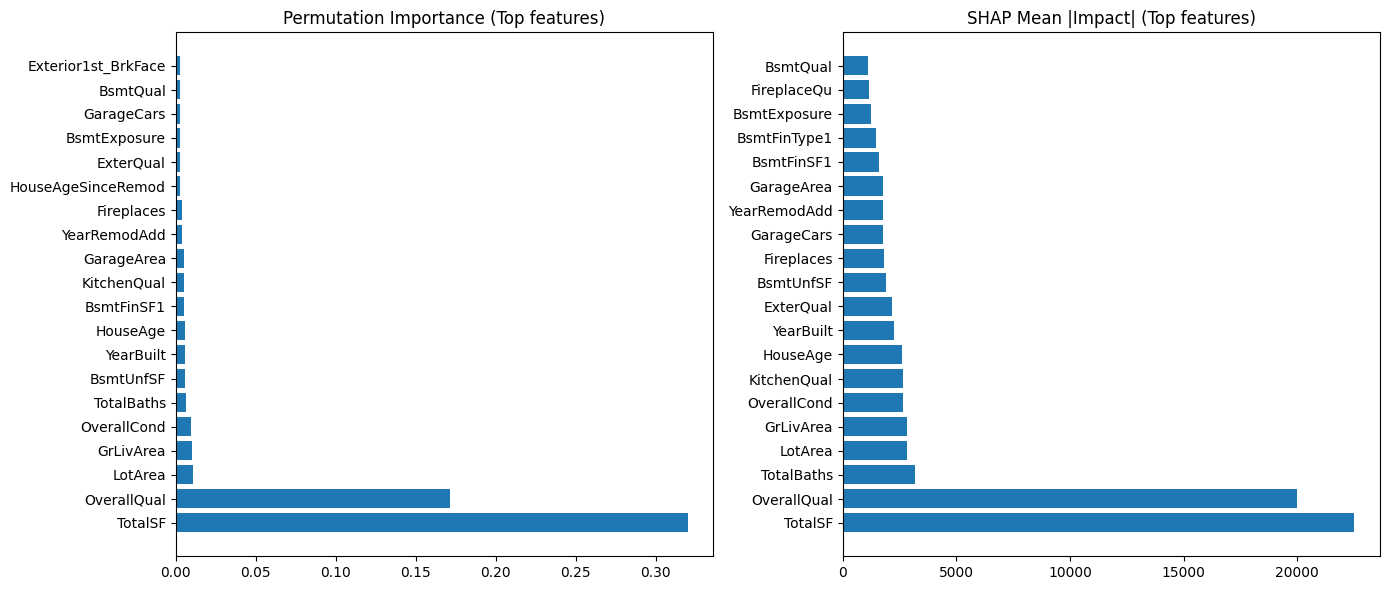

In [183]:
# ---- FAST importance plots without PolynomialFeatures ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap

# 1) Use your already-preprocessed data (no polynomial expansion)
X = transformed_df  # includes your engineered & interaction features
y = Ames["SalePrice"]

# If you have a tuned HGB model object, use it; otherwise create a solid default:
try:
    hgb = best_histgb  # your tuned HistGradientBoostingRegressor
except NameError:
    from sklearn.ensemble import HistGradientBoostingRegressor
    hgb = HistGradientBoostingRegressor(
        learning_rate=0.05, max_iter=800, max_depth=6, max_bins=64,
        min_samples_leaf=10, random_state=42
    )

hgb.fit(X, y)

# 2) Permutation importance (keep repeats modest to stay fast)
perm = permutation_importance(
    hgb, X, y, n_repeats=5, random_state=42
)

# 3) SHAP for tree models (use TreeExplainer + a small sample to be fast)
explainer = shap.TreeExplainer(hgb)
sample_idx = np.random.RandomState(42).choice(len(X), size=min(800, len(X)), replace=False)
X_sample = X.iloc[sample_idx]
shap_values = explainer.shap_values(X_sample)

# 4) Plot helpers
def topk(arr, names, k=20):
    idx = np.argsort(arr)[-k:][::-1]
    return idx, np.array(names)[idx], arr[idx]

def plot_barh(ax, names, vals, title):
    ax.barh(range(len(vals)), vals)
    ax.set_yticks(range(len(vals)))
    ax.set_yticklabels(names)
    ax.set_title(title)

# 5) Build the four-panel figure (baseline vs interactions not needed here;
#     you’re already using the dataset that includes your chosen interactions)
k = 20
idx_p, names_p, vals_p = topk(perm.importances_mean, X.columns, k)
idx_s, names_s, vals_s = topk(np.abs(shap_values).mean(axis=0), X_sample.columns, k)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_barh(axes[0], names_p, vals_p, "Permutation Importance (Top features)")
plot_barh(axes[1], names_s, vals_s, "SHAP Mean |Impact| (Top features)")
plt.tight_layout()
plt.show()

Exception ignored in: <function ResourceTracker.__del__ at 0x10747dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102d65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10696dbc0>
Traceback (most recent call last

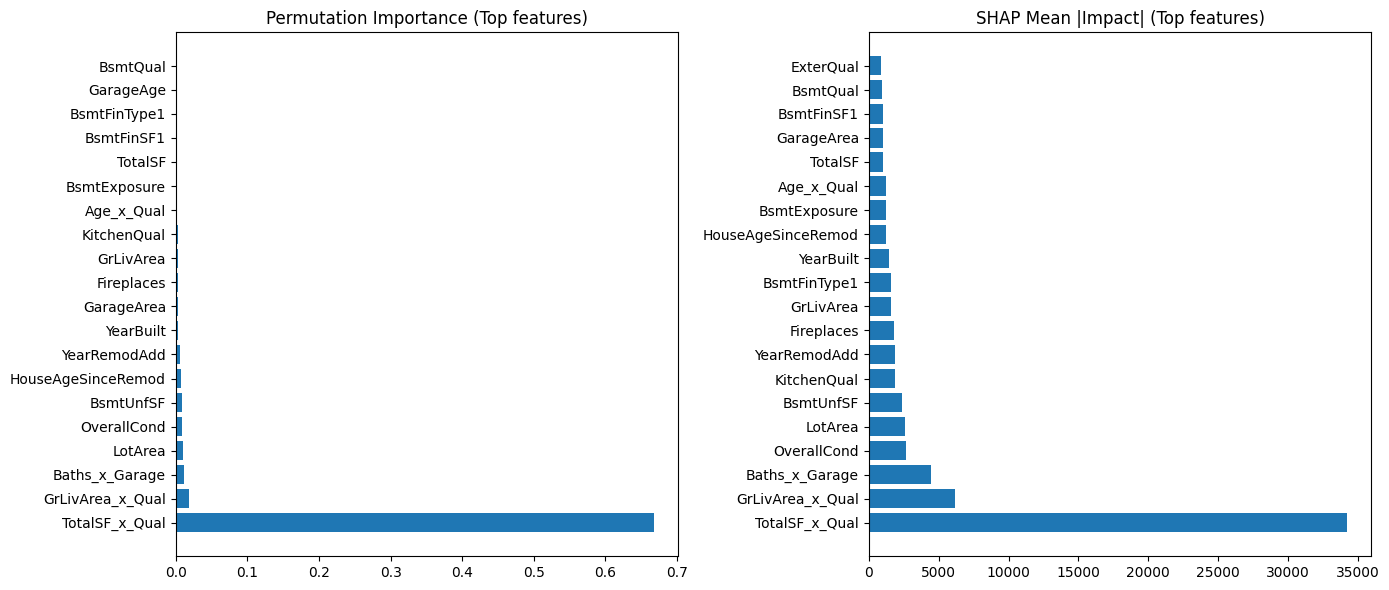

In [184]:
# ---- FAST importance plots without PolynomialFeatures ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap

# 1) Use your already-preprocessed data (no polynomial expansion)
X = transformed_df  # includes your engineered & interaction features
X = X_raw
y = Ames["SalePrice"]

# If you have a tuned HGB model object, use it; otherwise create a solid default:
try:
    hgb = best_histgb  # your tuned HistGradientBoostingRegressor
except NameError:
    from sklearn.ensemble import HistGradientBoostingRegressor
    hgb = HistGradientBoostingRegressor(
        learning_rate=0.05, max_iter=800, max_depth=6, max_bins=64,
        min_samples_leaf=10, random_state=42
    )

hgb.fit(X, y)

# 2) Permutation importance (keep repeats modest to stay fast)
perm = permutation_importance(
    hgb, X, y, n_repeats=5, random_state=42
)

# 3) SHAP for tree models (use TreeExplainer + a small sample to be fast)
explainer = shap.TreeExplainer(hgb)
sample_idx = np.random.RandomState(42).choice(len(X), size=min(800, len(X)), replace=False)
X_sample = X.iloc[sample_idx]
shap_values = explainer.shap_values(X_sample)

# 4) Plot helpers
def topk(arr, names, k=20):
    idx = np.argsort(arr)[-k:][::-1]
    return idx, np.array(names)[idx], arr[idx]

def plot_barh(ax, names, vals, title):
    ax.barh(range(len(vals)), vals)
    ax.set_yticks(range(len(vals)))
    ax.set_yticklabels(names)
    ax.set_title(title)

# 5) Build the four-panel figure (baseline vs interactions not needed here;
#     you’re already using the dataset that includes your chosen interactions)
k = 20
idx_p, names_p, vals_p = topk(perm.importances_mean, X.columns, k)
idx_s, names_s, vals_s = topk(np.abs(shap_values).mean(axis=0), X_sample.columns, k)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_barh(axes[0], names_p, vals_p, "Permutation Importance (Top features)")
plot_barh(axes[1], names_s, vals_s, "SHAP Mean |Impact| (Top features)")
plt.tight_layout()
plt.show()

In [488]:
# =========================
# Build a lean X_refined
# =========================
import pandas as pd

# 1) Core numeric features (keep if present)
core_numeric = [
    "TotalSF", "OverallQual", "GrLivArea", "TotalBaths",
    # keep ONE garage signal; we'll pick what's available below
    "GarageCars", "GarageArea",
    "LotArea", "YearBuilt", "YearRemodAdd",
    "HouseAge", "HouseAgeSinceRemod",
]

# 2) Targeted interactions (from your earlier engineering)
interactions = [
    "TotalSF_x_Qual", "GrLivArea_x_Qual",
    "Baths_x_Garage", "Age_x_Qual"
    # add "AgeRemod_x_Qual" here if you created it and want it
    # "AgeRemod_x_Qual",
]

# 3) Compact categorical dummies (prefix match)
#    - use the binned Neighborhood × quality combo (much leaner than full Neighborhood)
cat_prefixes = [
    "Neighborhood_QualBin_",
    "KitchenQual_", "BsmtQual_", "ExterQual_"
]

# ---- collect columns that actually exist in X_raw ----
present = set(X_raw.columns)

# pick one garage signal: prefer GarageCars, else GarageArea
garage_choice = "GarageCars" if "GarageCars" in present else ("GarageArea" if "GarageArea" in present else None)
core_keep = [c for c in core_numeric if c in present and c != "GarageCars" and c != "GarageArea"]
if garage_choice: 
    core_keep.append(garage_choice)

inter_keep = [c for c in interactions if c in present]

cat_keep = []
for p in cat_prefixes:
    cat_keep.extend([c for c in transformed_df.columns if c.startswith(p)])

keep_cols = core_keep + inter_keep + cat_keep
X_refined = X_raw[keep_cols].copy()

print(f"X_refined shape: {X_refined.shape}")
print("Kept (first 25):", keep_cols[:25])
missing = (set(core_numeric + interactions) - present)
if missing:
    print("Note: these requested columns were not found and were skipped:", sorted(missing))

X_refined shape: (2580, 78)
Kept (first 25): ['TotalSF', 'OverallQual', 'GrLivArea', 'TotalBaths', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'HouseAge', 'HouseAgeSinceRemod', 'GarageCars', 'TotalSF_x_Qual', 'GrLivArea_x_Qual', 'Baths_x_Garage', 'Age_x_Qual', 'Neighborhood_QualBin_Blmngtn_high', 'Neighborhood_QualBin_Blmngtn_med', 'Neighborhood_QualBin_Blueste_high', 'Neighborhood_QualBin_Blueste_med', 'Neighborhood_QualBin_BrDale_low', 'Neighborhood_QualBin_BrDale_med', 'Neighborhood_QualBin_BrkSide_low', 'Neighborhood_QualBin_BrkSide_med', 'Neighborhood_QualBin_ClearCr_high', 'Neighborhood_QualBin_ClearCr_low', 'Neighborhood_QualBin_ClearCr_med']


In [489]:
# Example: evaluate tuned HistGB or your linear baselines on X_refined
print(cv_eval_models_nonlinear(X_refined, y_final, cv=5, log_target=False, random_state=42).to_string(index=False))

KeyboardInterrupt: 

In [7]:
y_final = Ames.SalePrice

In [9]:
# === Compact feature set: top-K base features + engineered interactions ===
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import HistGradientBoostingRegressor

RANDOM_STATE = 42
TOP_K_BASE = 90 # number of base (non-interaction) features to keep

# -------------------------------
# A) Start from your preprocessed table
# -------------------------------
X_base = transformed_df.copy()        # (one-hot + numeric, no scaling needed for trees)
y = y_final

# -------------------------------
# B) Add interaction features (only if both parents exist)
# -------------------------------
def safe_interaction(df, out_name, a, b):
    if a in df.columns and b in df.columns:
        df[out_name] = df[a] * df[b]

safe_interaction(X_base, "TotalSF_x_Qual",   "TotalSF",   "OverallQual")
safe_interaction(X_base, "GrLivArea_x_Qual", "GrLivArea", "OverallQual")
safe_interaction(X_base, "Baths_x_Garage",   "TotalBaths","GarageCars")
safe_interaction(X_base, "Age_x_Qual",       "HouseAge",  "OverallQual")
safe_interaction(X_base, "AgeRemod_x_Qual",  "HouseAgeSinceRemod", "OverallQual")

interaction_cols = [c for c in X_base.columns if c.endswith("_x_Qual") or c=="Baths_x_Garage"]

# -------------------------------
# C) Fit a fast tree on log-target (TTR) to rank BASE features
# -------------------------------
# Reasonable, stable HGB settings (close to what performed well for you)
hgb = HistGradientBoostingRegressor(
    learning_rate=0.03, max_iter=1200, max_depth=6,
    min_samples_leaf=20, max_bins=64, l2_regularization=0.0,
    random_state=RANDOM_STATE
)
ttr = TransformedTargetRegressor(regressor=hgb, func=np.log1p, inverse_func=np.expm1)

# Train once (fast)
ttr.fit(X_base, y)

# Try SHAP first; fall back to permutation importance if SHAP isn't available
try:
    import shap
    expl = shap.Explainer(ttr.regressor_, X_base, feature_names=X_base.columns)
    shap_vals = expl(X_base, check_additivity=False)
    shap_importance = np.abs(shap_vals.values).mean(axis=0)
    imp_series = pd.Series(shap_importance, index=X_base.columns).sort_values(ascending=False)
except Exception:
    # Permutation importance in R² space (dollar target because TTR inverts)
    perm = permutation_importance(ttr, X_base, y, n_repeats=8, random_state=RANDOM_STATE, n_jobs=-1, scoring="r2")
    imp_series = pd.Series(perm.importances_mean, index=X_base.columns).sort_values(ascending=False)

# Exclude interactions from the base top-K selection to avoid double bias
base_pool = [c for c in X_base.columns if c not in interaction_cols]
top_base = [c for c in imp_series.index if c in base_pool][:TOP_K_BASE]

# -------------------------------
# D) Build refined matrix = top base + interactions
# -------------------------------
keep_cols = list(dict.fromkeys(top_base + interaction_cols))  # preserve order, drop dups
X_refined = X_base[keep_cols].copy()

print(f"Refined feature set: {len(keep_cols)} columns "
      f"(base={len(top_base)}, interactions={len(interaction_cols)})")

# -------------------------------
# E) (Optional) quick CV check with the same HGB+TTR
# -------------------------------
def rmse(y_true, y_pred): 
    return float(np.sqrt(((y_true - y_pred) ** 2).mean()))

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
fold_rmses = []
oof = np.zeros(len(y), dtype=float)

for tr_idx, va_idx in kf.split(X_refined):
    X_tr, X_va = X_refined.iloc[tr_idx], X_refined.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    ttr.fit(X_tr, y_tr)
    pred = ttr.predict(X_va)
    fold_rmses.append(rmse(y_va, pred))
    oof[va_idx] = pred

print(f"Quick CV — RMSE mean: {np.mean(fold_rmses):,.0f}  std: {np.std(fold_rmses):,.0f}   R²: {r2_score(y, oof):.6f}")

# Your refined table is in X_refined

 99%|===================| 2551/2580 [00:42<00:00]        

Refined feature set: 95 columns (base=90, interactions=5)
Quick CV — RMSE mean: 21,778  std: 2,286   R²: 0.914789


In [10]:
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'max_bins': [32, 64, 128],
    'min_samples_leaf': [5, 10, 20],
    'max_iter': [1000, 1500, 2000],
    'learning_rate': [0.01, 0.03, 0.05],
    'l2_regularization': [0.0, 0.1, 0.3, 1.0],
}

histgb = HistGradientBoostingRegressor(random_state=42)

grid = GridSearchCV(
    histgb,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_refined, y)
print("Best params:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

KeyboardInterrupt: 

In [11]:
# ==== Lean HistGB tuner for X_refined ====
import time
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import HistGradientBoostingRegressor

RANDOM_STATE = 42
INNER_CV = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def make_ttr(est):
    return TransformedTargetRegressor(
        regressor=est,
        func=np.log1p,      # train on log price
        inverse_func=np.expm1
    )

# Tight ranges centered on what worked before
param_dist = {
    "regressor__learning_rate":   np.array([0.01, 0.02, 0.03, 0.04, 0.05]),
    "regressor__max_iter":        np.array([1000, 1400, 1600, 1800, 2000]),
    "regressor__max_depth":       [4, 6, 8, 10],
    "regressor__min_samples_leaf":[5, 10, 15, 20, 30],
    "regressor__max_bins":        [64, 96, 128],
    "regressor__l2_regularization":[0.0, 0.1, 0.3],
}

hgb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
search = RandomizedSearchCV(
    estimator=make_ttr(hgb),
    param_distributions=param_dist,
    n_iter=22,                                # ~ fast but thorough
    scoring="neg_root_mean_squared_error",    # RMSE in $ (thanks to TTR)
    cv=INNER_CV,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

t0 = time.time()
search.fit(X_refined, y_final)   # <— use your refined matrix here
print(f"\nTuning elapsed: {time.time()-t0:.1f}s")

# Pretty print best
best_params = {k.replace("regressor__", ""): v for k, v in search.best_params_.items()}
print("Best HistGB params:", best_params)
print("Best CV RMSE ($):", -search.best_score_)

# === Optional: quick outer-CV check with your existing helper ===
# If you have cv_eval_models_nonlinear from earlier and want a leaderboard-style eval:
# models_tuned = [("HistGB_tuned", search.best_estimator_)]
# print(cv_eval_models_nonlinear(X_refined, y_final, cv=5, log_target=False,
#                                random_state=RANDOM_STATE, models=models_tuned)
#       .to_string(index=False))

Fitting 5 folds for each of 22 candidates, totalling 110 fits

Tuning elapsed: 29.4s
Best HistGB params: {'min_samples_leaf': 15, 'max_iter': np.int64(1800), 'max_depth': 4, 'max_bins': 128, 'learning_rate': np.float64(0.04), 'l2_regularization': 0.3}
Best CV RMSE ($): 21423.11575451983


In [12]:
# === Refined GridSearch for HistGradientBoostingRegressor ===
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor

# Assumes you already have:
#   X_refined  -> your current best feature matrix (pandas DataFrame or ndarray)
#   y          -> SalePrice (raw $ target)

RANDOM_STATE = 42
inner_cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

param_grid_refined = {
    'max_depth': [3, 4, 5],
    'max_bins': [64, 96],
    'min_samples_leaf': [3, 5, 8],
    'max_iter': [800, 1000, 1200],
    'learning_rate': [0.04, 0.05, 0.06],
    'l2_regularization': [0.05, 0.1, 0.2],
}

histgb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)

grid_ref = GridSearchCV(
    estimator=histgb,
    param_grid=param_grid_refined,
    scoring='neg_root_mean_squared_error',   # RMSE in $-space
    cv=inner_cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid_ref.fit(X_refined, y)

best_rmse = -grid_ref.best_score_
print("\n[Refined GridSearch] Best params:", grid_ref.best_params_)
print(f"[Refined GridSearch] Best CV RMSE: {best_rmse:,.2f} $")

# ---- Quick confirmation CV with the best estimator ----
best_est = grid_ref.best_estimator_

rmse_scores = -cross_val_score(best_est, X_refined, y,
                               scoring='neg_root_mean_squared_error',
                               cv=inner_cv, n_jobs=-1)
r2_scores = cross_val_score(best_est, X_refined, y,
                            scoring='r2',
                            cv=inner_cv, n_jobs=-1)

print(f"\n[Confirm CV] RMSE mean: {rmse_scores.mean():,.0f}  std: {rmse_scores.std():,.0f}   "
      f"R² mean: {r2_scores.mean():.6f}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits

[Refined GridSearch] Best params: {'l2_regularization': 0.1, 'learning_rate': 0.05, 'max_bins': 64, 'max_depth': 3, 'max_iter': 1200, 'min_samples_leaf': 8}
[Refined GridSearch] Best CV RMSE: 21,800.81 $

[Confirm CV] RMSE mean: 21,801  std: 3,610   R² mean: 0.914366


In [234]:
X_refined_K90 = X_refined

In [237]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import HistGradientBoostingRegressor

# Use your refined matrix for K=90
Xk = X_refined_K90      # <- make sure this variable holds your K=90 feature matrix
y  = Ames["SalePrice"]

# Best params from K=90 run
hgb_best = HistGradientBoostingRegressor(
    max_depth=3,
    max_iter=1200,
    learning_rate=0.06,
    min_samples_leaf=8,
    max_bins=64,
    l2_regularization=0.2,
    random_state=42
)

# RMSE scorer in $-space
rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

cv10 = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(hgb_best, Xk, y, cv=cv10, scoring=rmse_scorer, n_jobs=-1)
rmse_mean = -scores.mean()
rmse_std  = scores.std()
print(f"[HGB @ K=90, 10-fold] RMSE mean: {rmse_mean:,.0f}   std: {rmse_std:,.0f}")

[HGB @ K=90, 10-fold] RMSE mean: 18,245   std: 2,636


Exception ignored in: <function ResourceTracker.__del__ at 0x107de9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [239]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

cv10 = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_scores, r2_scores = [], []

for train_idx, test_idx in cv10.split(Xk):
    X_train, X_test = Xk[train_idx], Xk[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    hgb_best.fit(X_train, y_train)
    preds = hgb_best.predict(X_test)
    
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, preds)))
    r2_scores.append(r2_score(y_test, preds))

print(f"[HGB @ K=90, 10-fold] "
      f"RMSE mean: {np.mean(rmse_scores):,.0f}   std: {np.std(rmse_scores):,.0f}   "
      f"R² mean: {np.mean(r2_scores):.6f}   std: {np.std(r2_scores):.6f}")

KeyError: "None of [Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n       ...\n       2568, 2569, 2570, 2571, 2572, 2573, 2575, 2576, 2577, 2579],\n      dtype='int64', length=2322)] are in the [columns]"

Exception ignored in: <function ResourceTracker.__del__ at 0x104d65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104c65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10a065bc0>
Traceback (most recent call last

In [240]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

cv10 = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_scores, r2_scores = [], []

# If y is a pandas Series, grab a NumPy view once
y_np = y.to_numpy() if hasattr(y, "to_numpy") else y

for train_idx, test_idx in cv10.split(Xk):
    # Rows by position for Xk (handles DataFrame or ndarray)
    if hasattr(Xk, "iloc"):
        X_train, X_test = Xk.iloc[train_idx], Xk.iloc[test_idx]
    else:
        X_train, X_test = Xk[train_idx], Xk[test_idx]
        
    # y as NumPy by position
    y_train, y_test = y_np[train_idx], y_np[test_idx]
    
    hgb_best.fit(X_train, y_train)
    preds = hgb_best.predict(X_test)
    
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, preds)))
    r2_scores.append(r2_score(y_test, preds))

print(
    f"[HGB @ K=90, 10-fold] "
    f"RMSE mean: {np.mean(rmse_scores):,.0f}   std: {np.std(rmse_scores):,.0f}   "
    f"R² mean: {np.mean(r2_scores):.6f}   std: {np.std(r2_scores):.6f}"
)

[HGB @ K=90, 10-fold] RMSE mean: 18,245   std: 2,636   R² mean: 0.932163   std: 0.020885


In [241]:
from itertools import product
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor

# === tiny neighborhood around your current best ===
grid = {
    "learning_rate":       [0.04, 0.05, 0.06],
    "min_samples_leaf":    [5, 8, 10],
    "max_bins":            [64, 96],
    "max_depth":           [3, 4],
    "max_iter":            [1000, 1200, 1500],
    "l2_regularization":   [0.05, 0.1, 0.2],
}

def cv_rmse_r2(est, X, y, n_splits=10, seed=42):
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    rmses, r2s = [], []
    y_np = y.to_numpy() if hasattr(y, "to_numpy") else y
    for tr, va in cv.split(X):
        X_tr = X.iloc[tr] if hasattr(X, "iloc") else X[tr]
        X_va = X.iloc[va] if hasattr(X, "iloc") else X[va]
        y_tr, y_va = y_np[tr], y_np[va]
        est.fit(X_tr, y_tr)
        pred = est.predict(X_va)
        rmses.append(np.sqrt(mean_squared_error(y_va, pred)))
        r2s.append(r2_score(y_va, pred))
    return (float(np.mean(rmses)), float(np.std(rmses)),
            float(np.mean(r2s)),  float(np.std(r2s)))

best = {"rmse": float("inf")}
for params in product(*grid.values()):
    p = dict(zip(grid.keys(), params))
    est = HistGradientBoostingRegressor(random_state=42, **p)
    rm, rsd, r2m, r2sd = cv_rmse_r2(est, Xk, y, n_splits=10, seed=42)
    if rm < best["rmse"]:
        best = {"rmse": rm, "rmse_std": rsd, "r2": r2m, "r2_std": r2sd, "params": p}

print("[HGB micro-refine @ K=90, 10-fold]")
print(f"Best params: {best['params']}")
print(f"RMSE mean: {best['rmse']:,.0f}   std: {best['rmse_std']:,.0f}   "
      f"R² mean: {best['r2']:.6f}   std: {best['r2_std']:.6f}")

KeyboardInterrupt: 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time

t0 = time.time()
Xtr, Xva, ytr, yva = train_test_split(Xk, y, test_size=0.2, random_state=42, shuffle=True)

hgb_best.fit(Xtr, ytr)
pred = hgb_best.predict(Xva)

rmse = float(np.sqrt(mean_squared_error(yva, pred)))
r2   = float(r2_score(yva, pred))

print(f"[HGB @ K={Xk.shape[1]}, 80/20 split] RMSE: {rmse:,.0f}   R²: {r2:.6f}   ({time.time()-t0:.2f}s)")

NameError: name 'Xk' is not defined

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np, time

t0 = time.time()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores, r2_scores = [], []
y_np = y.to_numpy() if hasattr(y, "to_numpy") else np.asarray(y)

for tr_idx, va_idx in kf.split(Xk):
    # robust positional indexing for DataFrame or ndarray
    X_tr = Xk.iloc[tr_idx] if hasattr(Xk, "iloc") else Xk[tr_idx]
    X_va = Xk.iloc[va_idx] if hasattr(Xk, "iloc") else Xk[va_idx]
    y_tr, y_va = y_np[tr_idx], y_np[va_idx]

    hgb_best.fit(X_tr, y_tr)
    pred = hgb_best.predict(X_va)

    rmse_scores.append(np.sqrt(mean_squared_error(y_va, pred)))
    r2_scores.append(r2_score(y_va, pred))

print(f"[HGB @ K={Xk.shape[1]}, 5-fold] "
      f"RMSE mean: {np.mean(rmse_scores):,.0f}   std: {np.std(rmse_scores):,.0f}   "
      f"R² mean: {np.mean(r2_scores):.6f}   std: {np.std(r2_scores):.6f}   "
      f"({time.time()-t0:.2f}s)")

NameError: name 'Xk' is not defined

In [25]:
import time
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import clone

def _to_numpy(a):
    """Safely get a numpy array from pandas/ndarray with positional indexing compatibility."""
    return a.to_numpy() if hasattr(a, "to_numpy") else np.asarray(a)

def _rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def quick_eval(
    estimator,
    X,
    y,
    *,
    mode="cv5",              # "holdout", "cvK" (e.g. "cv5", "cv10")
    random_state=42,
    test_size=0.2,          # used for holdout
    shuffle=True,
    return_oof=False,       # for CV: return out-of-fold preds
    verbose=True
):
    """
    Fast evaluator for regressors.
      - mode="holdout": single 80/20 (or set test_size) split
      - mode="cvK": K-fold CV (e.g. "cv5", "cv10")
    Prints a compact summary and returns a results dict.
    Does NOT mutate the passed estimator (uses clone).
    """
    t0 = time.time()
    X_np = X if not hasattr(X, "iloc") else X.to_numpy()
    y_np = _to_numpy(y)

    results = {}

    if mode.lower() == "holdout":
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_np, y_np, test_size=test_size, shuffle=shuffle, random_state=random_state
        )
        est = clone(estimator)
        est.fit(X_tr, y_tr)
        preds = est.predict(X_te)

        rmse = _rmse(y_te, preds)
        r2   = float(r2_score(y_te, preds))

        results.update({
            "mode": "holdout",
            "rmse": rmse,
            "r2": r2,
            "elapsed_sec": time.time() - t0,
            "estimator": est
        })

        if verbose:
            print(f"[{estimator.__class__.__name__} @ holdout {int((1-test_size)*100)}/{int(test_size*100)}] "
                  f"RMSE: {rmse:,.0f}   R²: {r2:.6f}   ({results['elapsed_sec']:.2f}s)")

        return results

    # ---- CV path ----
    if mode.lower().startswith("cv"):
        try:
            k = int(mode.lower().replace("cv", ""))
        except Exception:
            raise ValueError("For CV, use mode like 'cv5', 'cv10', etc.")

        kf = KFold(n_splits=k, shuffle=shuffle, random_state=random_state)
        fold_rmses, fold_r2 = [], []
        oof = np.zeros(len(y_np), dtype=float) if return_oof else None

        for tr_idx, va_idx in kf.split(X_np):
            X_tr, X_va = X_np[tr_idx], X_np[va_idx]
            y_tr, y_va = y_np[tr_idx], y_np[va_idx]

            est = clone(estimator)
            est.fit(X_tr, y_tr)
            pred = est.predict(X_va)

            fold_rmses.append(_rmse(y_va, pred))
            fold_r2.append(r2_score(y_va, pred))
            if return_oof:
                oof[va_idx] = pred

        rmse_mean, rmse_std = float(np.mean(fold_rmses)), float(np.std(fold_rmses, ddof=0))
        r2_mean,   r2_std   = float(np.mean(fold_r2)),   float(np.std(fold_r2, ddof=0))

        results.update({
            "mode": f"cv{k}",
            "rmse_mean": rmse_mean,
            "rmse_std": rmse_std,
            "r2_mean": r2_mean,
            "r2_std": r2_std,
            "elapsed_sec": time.time() - t0,
        })
        if return_oof:
            results["oof_pred"] = oof

        if verbose:
            print(f"[{estimator.__class__.__name__} @ {k}-fold] "
                  f"RMSE mean: {rmse_mean:,.0f}   std: {rmse_std:,.0f}   "
                  f"R² mean: {r2_mean:.6f}   std: {r2_std:.6f}   "
                  f"({results['elapsed_sec']:.2f}s)")

        return results

    raise ValueError("mode must be 'holdout' or like 'cv5', 'cv10', ...")

In [26]:
# Example with your tuned HistGradientBoostingRegressor named hgb_best
# Xk: your K-best feature matrix, y: target in dollars

# quick 80/20 check:
res_holdout = quick_eval(hgb_best, Xk, y, mode="holdout")

# 5-fold CV confirmation:
res_cv5 = quick_eval(hgb_best, Xk, y, mode="cv5")

# 10-fold (only when you want the tightest estimate)
res_cv10 = quick_eval(hgb_best, Xk, y, mode="cv10")

NameError: name 'hgb_best' is not defined

In [22]:
# ===== CatBoost baseline + blend with your tuned HistGB =====
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor

# ---- tiny helpers ----
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def kfold_oof(model_factory, X, y, *, n_splits=5, random_state=42, verbose=False):
    from catboost import CatBoostRegressor  # local import so this stays optional
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    y = np.asarray(y)
    oof = np.zeros_like(y, dtype=float)
    fold_rmses, fold_r2 = [], []

    for i, (tr, va) in enumerate(kf.split(X), 1):
        X_tr = X.iloc[tr] if hasattr(X, "iloc") else X[tr]
        X_va = X.iloc[va] if hasattr(X, "iloc") else X[va]
        y_tr, y_va = y[tr], y[va]

        m = model_factory()

        if isinstance(m, CatBoostRegressor):
            # CatBoost supports eval_set/use_best_model
            m.fit(X_tr, y_tr, eval_set=(X_va, y_va), use_best_model=True, verbose=False)
        else:
            # sklearn models: just fit (use internal early stopping if enabled)
            m.fit(X_tr, y_tr)

        pred = m.predict(X_va)
        oof[va] = pred
        fold_rmses.append(rmse(y_va, pred))
        fold_r2.append(r2_score(y_va, pred))
        if verbose:
            print(f"[Fold {i}] RMSE={fold_rmses[-1]:,.0f}  R²={fold_r2[-1]:.5f}")

    return (oof,
            float(np.mean(fold_rmses)), float(np.std(fold_rmses, ddof=0)),
            float(np.mean(fold_r2)),   float(np.std(fold_r2,   ddof=0)))

# ---- A) CatBoost baseline (fast, strong for tabular) ----
# Xk : your refined feature matrix (DataFrame or ndarray)
# y  : target in $ space (no log)
# hgb_best : your tuned HistGradientBoostingRegressor (already in $ space)

def catboost_factory():
    return CatBoostRegressor(
        loss_function="RMSE",
        iterations=2000,            # will stop early
        learning_rate=0.05,
        depth=6,                    # try 6–8 if you want to push a bit
        l2_leaf_reg=3.0,
        subsample=0.8,
        colsample_bylevel=0.8,
        random_state=42,
        early_stopping_rounds=100,
        verbose=False,
        thread_count=-1             # use all threads; no joblib child procs
    )

print("\n=== CatBoost baseline (5-fold OOF) ===")
cb_oof, cb_rm, cb_sd, cb_r2m, cb_r2sd = kfold_oof(catboost_factory, Xk, y, n_splits=5, random_state=42)
print(f"CatBoost  RMSE mean: {cb_rm:,.0f}   std: {cb_sd:,.0f}   R² mean: {cb_r2m:.6f}   std: {cb_r2sd:.6f}")

# ---- B) OOF for your tuned HGB (so we can blend apples-to-apples) ----
def hgb_factory():
    from sklearn.ensemble import HistGradientBoostingRegressor
    params = hgb_best.get_params()
    # enable internal early stopping if not already set
    params.setdefault("early_stopping", True)
    params.setdefault("validation_fraction", 0.1)
    params.setdefault("n_iter_no_change", 50)
    return HistGradientBoostingRegressor(**params)

print("\n=== HistGB (tuned) 5-fold OOF ===")
hgb_oof, hgb_rm, hgb_sd, hgb_r2m, hgb_r2sd = kfold_oof(hgb_factory, Xk, y, n_splits=5, random_state=42)
print(f"HistGB     RMSE mean: {hgb_rm:,.0f}   std: {hgb_sd:,.0f}   R² mean: {hgb_r2m:.6f}   std: {hgb_r2sd:.6f}")

# ---- C) Simple weight search to blend the two OOF predictions ----
weights = np.linspace(0.0, 1.0, 101)  # weight on CatBoost (1-w on HGB)
rmses = []
for w in weights:
    blend = w*cb_oof + (1-w)*hgb_oof
    rmses.append(rmse(y, blend))
w_best = float(weights[int(np.argmin(rmses))])
rmse_best = float(np.min(rmses))
r2_best = float(r2_score(y, w_best*cb_oof + (1-w_best)*hgb_oof))

print("\n=== Blending (OOF) ===")
print(f"Best weight on CatBoost: w = {w_best:.2f}")
print(f"Blended OOF RMSE: {rmse_best:,.0f}   R²: {r2_best:.6f}")

# ---- D) Train final models on full data + make a predict() for the blend ----
cb_full = catboost_factory().fit(Xk, y, eval_set=(Xk, y), use_best_model=False, verbose=False)
hgb_full = hgb_factory().fit(Xk, y)

def predict_blend(X):
    """Predict with the full-data models and the learned blend weight."""
    p_cb  = cb_full.predict(X)
    p_hgb = hgb_full.predict(X)
    return w_best*p_cb + (1-w_best)*p_hgb

# Example: in-sample blended performance (sanity check)
blend_in = predict_blend(Xk)
print("\n=== Full-data fit (sanity check) ===")
print(f"In-sample RMSE: {rmse(y, blend_in):,.0f}   R²: {r2_score(y, blend_in):.6f}")


=== CatBoost baseline (5-fold OOF) ===


NameError: name 'Xk' is not defined

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Xk, y: your refined feature matrix and target
X_tr, X_te, y_tr, y_te = train_test_split(Xk, y, test_size=0.2, random_state=42)

# Refit best single models on training split (CatBoost + HGB)
cat_params = dict(
    loss_function="RMSE",
    depth=8, learning_rate=0.05, l2_leaf_reg=6.0,
    iterations=6000, early_stopping_rounds=200,
    subsample=0.7, colsample_bylevel=0.7,
    random_seed=42, verbose=False, allow_writing_files=False
)
from catboost import CatBoostRegressor
cat_tr = CatBoostRegressor(**cat_params)
cat_tr.fit(X_tr, y_tr, eval_set=(X_te, y_te), use_best_model=True)

from sklearn.ensemble import HistGradientBoostingRegressor
hgb_params = hgb_best.get_params() if "hgb_best" in globals() else {
    "max_depth": 3, "learning_rate": 0.06, "max_iter": 1200,
    "min_samples_leaf": 8, "l2_regularization": 0.2,
    "max_bins": 96, "early_stopping": True, "validation_fraction": 0.1,
    "n_iter_no_change": 50, "random_state": 42
}
hgb_tr = HistGradientBoostingRegressor(**hgb_params)
hgb_tr.fit(X_tr, y_tr)

# Predictions
p_cat = cat_tr.predict(X_te)
p_hgb = hgb_tr.predict(X_te)

# Use the OOF-optimal weight you found (0.72) and also check a quick sweep around it
def rmse(a,b): return float(np.sqrt(mean_squared_error(a,b)))
ws = np.linspace(0.6, 0.85, 11)
best = min(((w, rmse(y_te, w*p_cat + (1-w)*p_hgb)) for w in ws), key=lambda t:t[1])
w_star, rmse_star = best
p_blend = w_star * p_cat + (1 - w_star) * p_hgb

print(f"[Holdout] CatBoost: RMSE {rmse(y_te,p_cat):,.0f}  R² {r2_score(y_te,p_cat):.6f}")
print(f"[Holdout] HGB     : RMSE {rmse(y_te,p_hgb):,.0f}  R² {r2_score(y_te,p_hgb):.6f}")
print(f"[Holdout] Blend(w={w_star:.2f}): RMSE {rmse_star:,.0f}  R² {r2_score(y_te,p_blend):.6f}")

NameError: name 'Xk' is not defined

In [20]:
# --- Ultra-fast CatBoost micro-tune (holdout-only) ---
import numpy as np, time
from itertools import product
from random import Random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

def rmse(y_true, y_pred): 
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def fast_catboost_holdout_tune(
    X, y, *,
    n_candidates=12,
    iterations=5000,
    early_stopping_rounds=200,
    random_state=42,
    sample_rows=None,          # e.g. 1800 to tune on a subset; None = all rows
    param_space=None
):
    t0 = time.time()
    rng = Random(random_state)

    # optional row subsample for speed
    if sample_rows is not None and sample_rows < len(y):
        idx = np.random.RandomState(random_state).choice(len(y), size=sample_rows, replace=False)
        Xs, ys = X.iloc[idx], y.iloc[idx]
    else:
        Xs, ys = X, y

    # single holdout split
    X_tr, X_va, y_tr, y_va = train_test_split(Xs, ys, test_size=0.2, random_state=random_state)

    # small, sensible search space (feel free to tweak ranges)
    if param_space is None:
        param_space = {
            "depth":              [6, 7, 8, 9],
            "learning_rate":      [0.035, 0.045, 0.055],
            "l2_leaf_reg":        [3.0, 6.0, 10.0],
            "subsample":          [0.65, 0.75, 0.85],
            "colsample_bylevel":  [0.6, 0.7, 0.8],
        }

    # random subset of the cartesian product
    all_grid = list(product(*param_space.values()))
    rng.shuffle(all_grid)
    grid = all_grid[:n_candidates]

    best_rmse, best_params, best_model = float("inf"), None, None

    for combo in grid:
        params = {k: v for k, v in zip(param_space.keys(), combo)}
        model = CatBoostRegressor(
            loss_function="RMSE",
            iterations=iterations,
            early_stopping_rounds=early_stopping_rounds,
            random_seed=random_state,
            allow_writing_files=False,
            verbose=False,
            thread_count=-1,
            **params
        )
        model.fit(X_tr, y_tr, eval_set=(X_va, y_va), use_best_model=True, verbose=False)
        preds = model.predict(X_va)
        score = rmse(y_va, preds)
        if score < best_rmse:
            best_rmse, best_params, best_model = score, params, model

    # refit best on full data at the best iteration discovered
    best_iters = int(best_model.get_best_iteration() or iterations)
    final_model = CatBoostRegressor(
        loss_function="RMSE",
        iterations=best_iters,
        random_seed=random_state,
        allow_writing_files=False,
        verbose=False,
        thread_count=-1,
        **best_params
    ).fit(X, y)

    elapsed = time.time() - t0
    print(f"[Fast CB tune] Best holdout RMSE: {best_rmse:,.0f} | params={best_params} | iters={best_iters}  ({elapsed:.2f}s)")
    return final_model, best_params, best_rmse, best_iters

# === run it ===
# Use your refined matrix & target: Xk, y
cb_fast, cb_params, cb_rmse, cb_iters = fast_catboost_holdout_tune(
    Xk, y,
    n_candidates=14,           # try 8–20 depending on patience
    iterations=5000,
    early_stopping_rounds=200,
    sample_rows=None,          # or e.g. 1800 to be even faster
    random_state=42
)

# quick 80/20 report for the chosen model
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(Xk, y, test_size=0.2, random_state=42)
cb_fast.fit(X_tr, y_tr, eval_set=(X_te, y_te), use_best_model=True, verbose=False)
preds = cb_fast.predict(X_te)
print(f"[CatBoost fast] Holdout RMSE: {rmse(y_te, preds):,.0f}   R²: {r2_score(y_te, preds):.6f}")

NameError: name 'Xk' is not defined

In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses, r2s = [], []
for tr, va in kf.split(Xk):
    m = CatBoostRegressor(
        loss_function="RMSE",
        iterations=cb_iters,  # fixed
        random_seed=42, allow_writing_files=False, verbose=False, thread_count=-1,
        **cb_params
    ).fit(Xk.iloc[tr], y.iloc[tr])
    p = m.predict(Xk.iloc[va])
    rmses.append(rmse(y.iloc[va], p))
    r2s.append(r2_score(y.iloc[va], p))
print(f"[CatBoost quick 5-fold] RMSE mean: {np.mean(rmses):,.0f}  std: {np.std(rmses):,.0f}  "
      f"R² mean: {np.mean(r2s):.6f}  std: {np.std(r2s):.6f}")

NameError: name 'Xk' is not defined